<a href="https://colab.research.google.com/github/angiegh2002/DM-ML/blob/main/DM%26MLaftered1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import library

In [2]:
!pip install missingno

In [3]:
!pip install optuna
!pip install xgboost
!pip install imblearn
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.6 MB/s eta 0:00:00


In [4]:
!pip install catboost
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successful

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    average_precision_score,
    precision_recall_curve
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#louding data

In [44]:
df=pd.read_csv('/content/drive/MyDrive/DM&ML/Loan_Default.csv')

In [45]:
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

#EDA

##Statistical Summary

In [ ]:
df.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

<div dir="rtl">

</div>

In [ ]:
missing_percent= df.isnull().mean().sort_values(ascending=False)*100
missing_percent[missing_percent > 0]

Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
dtir1                        16.224524
LTV                          10.155378
property_value               10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
submission_of_application     0.134526
age                           0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
dtype: float64

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
dtype: int64

In [ ]:
print(df.nunique())

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [ ]:
print(df.duplicated().sum())

0


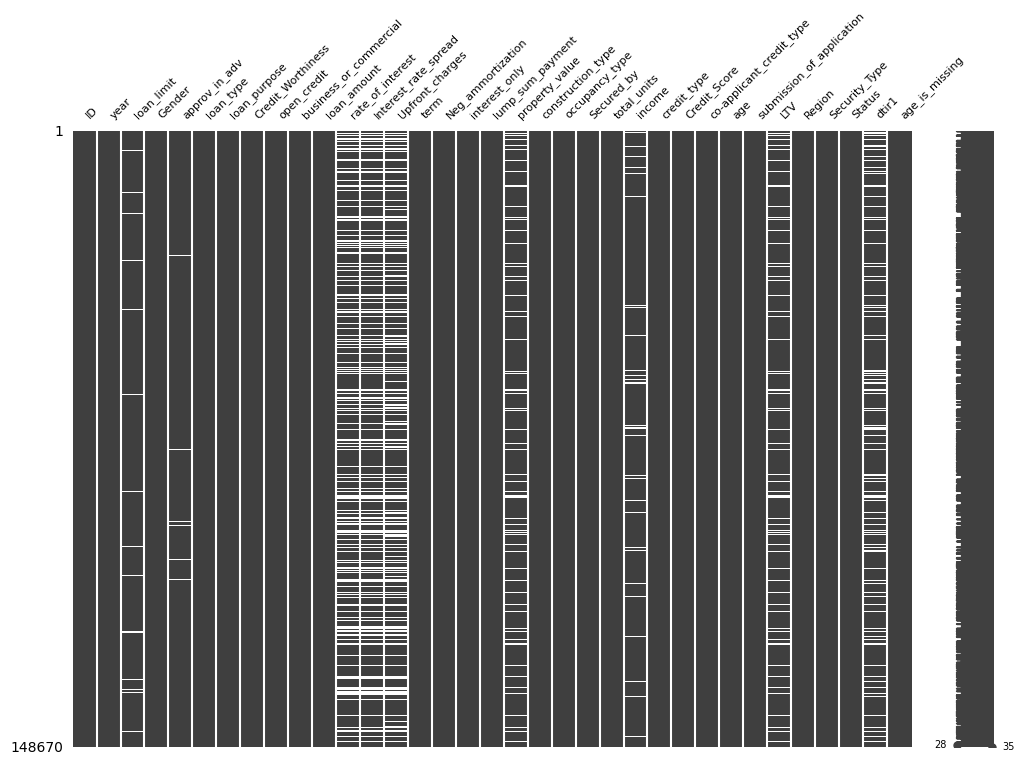

In [ ]:
msno.matrix(df, figsize=(12, 8),fontsize=8)
plt.show()

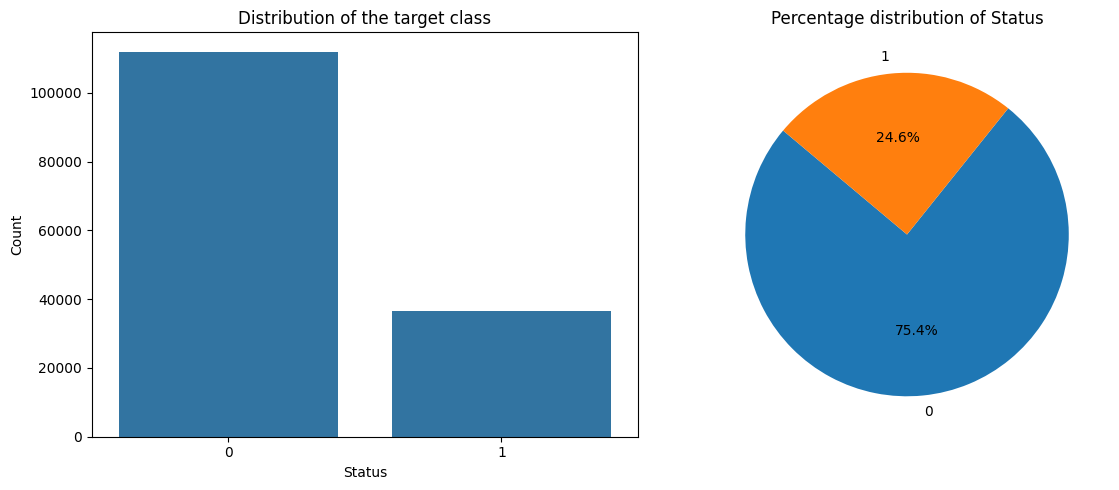

In [198]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Status', data=df, ax=axes[0])
axes[0].set_title("Distribution of the target class")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Count")

status_counts = df['Status'].value_counts()
axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Percentage distribution of Status")

plt.tight_layout()
plt.show()


<div dir="rtl">

- توزع متغير الهدف غير متوازن خيس تمثل عدد القروض التي تم التخلف عن سدادها 24.6% من البيانات
- يجب اخذ ذلك بالاعتبار وتطبيق تقنيات اعادة التوازن

</div>

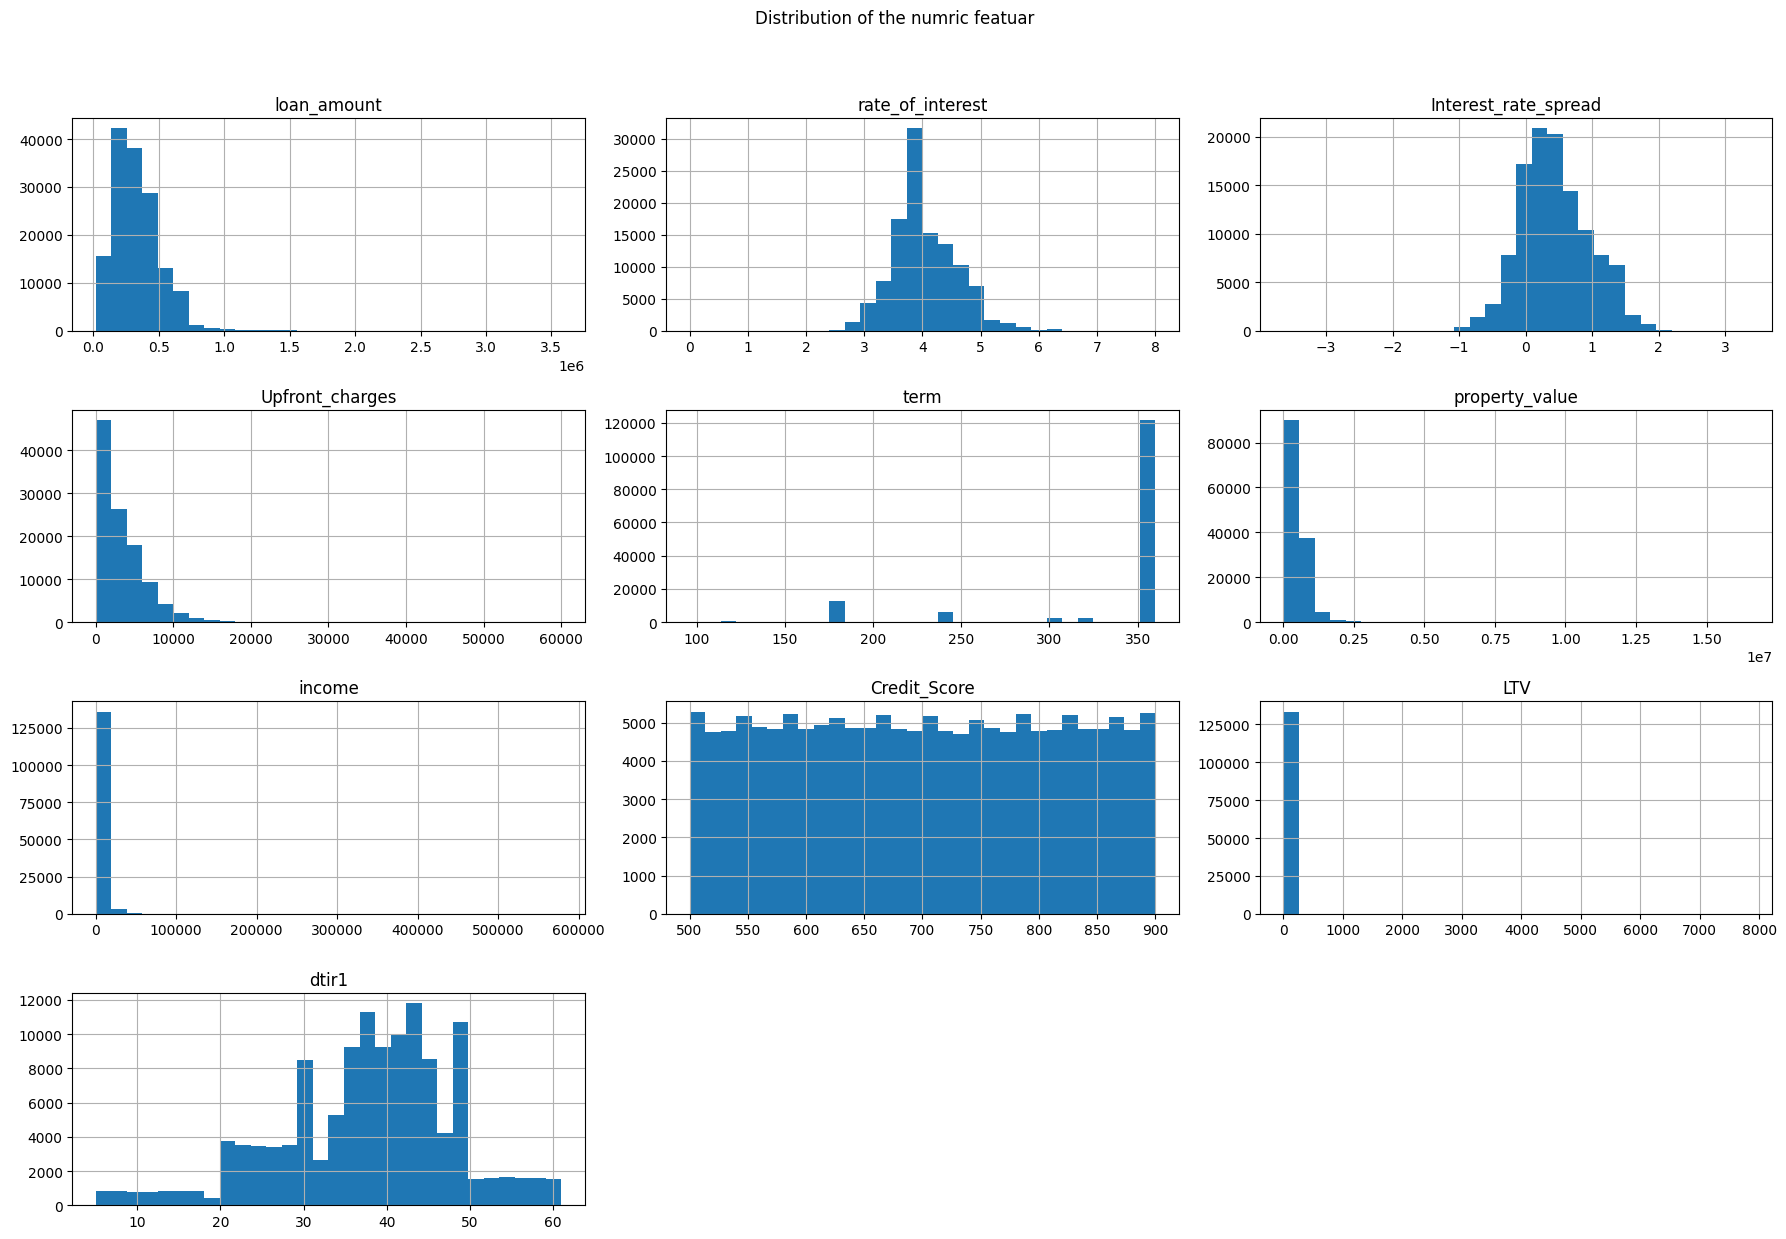

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['ID', 'year', 'Status']
plot_cols = [col for col in numeric_cols if col not in cols_to_exclude]
df[plot_cols].hist(bins=30, figsize=(18, 13))
plt.suptitle("Distribution of the numric featuar")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

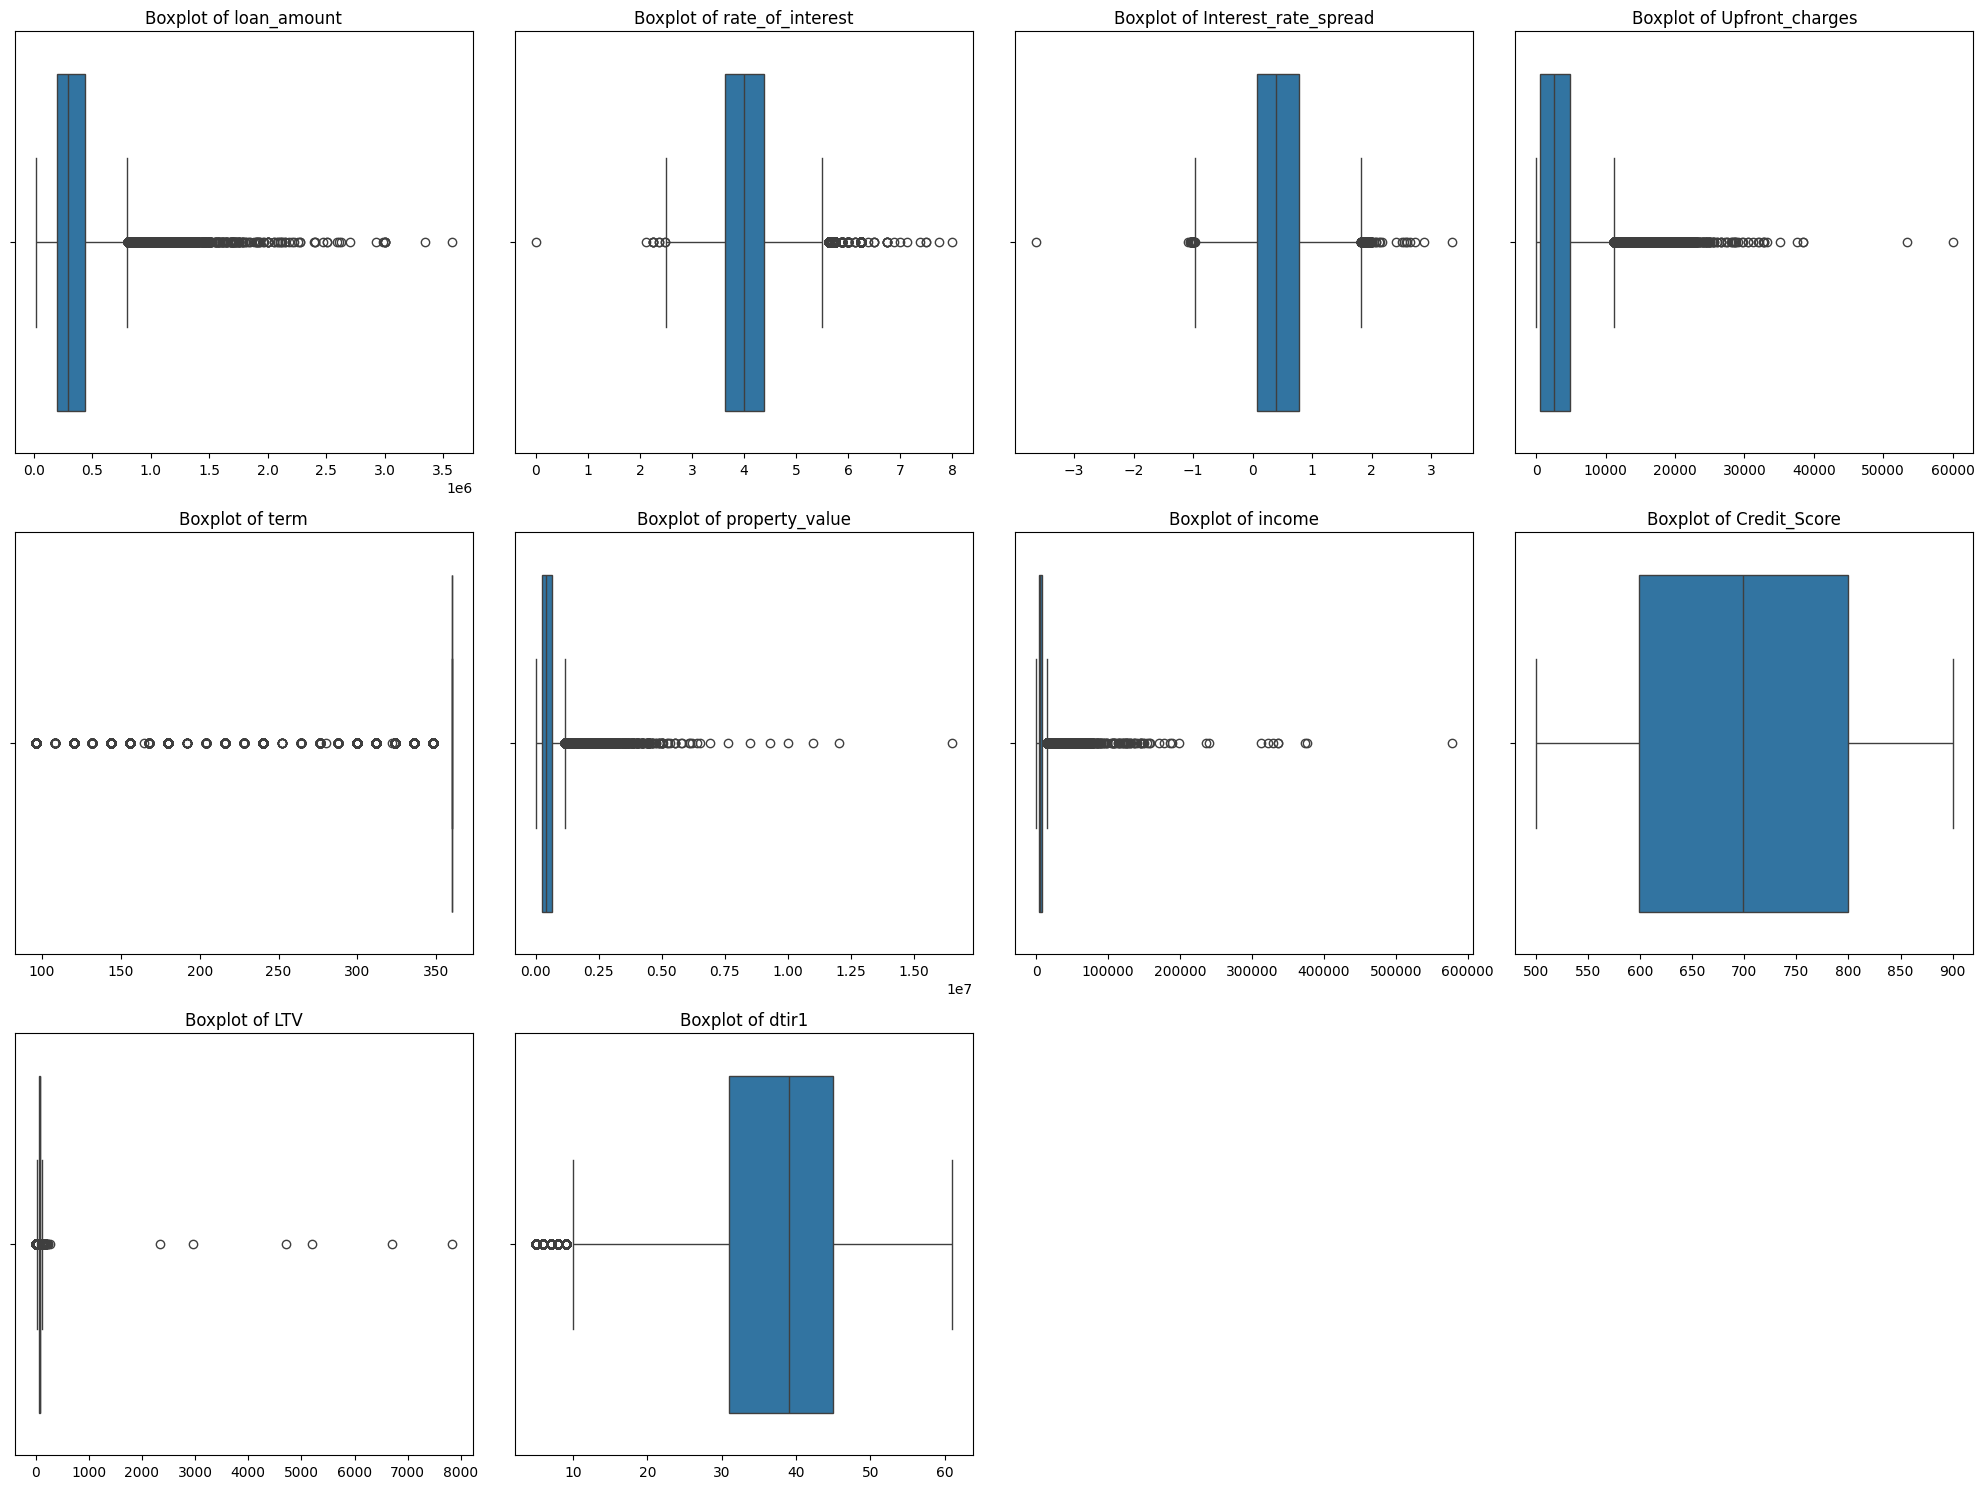

In [ ]:
rows = (len(plot_cols) + 3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div dir="rtl">

- معظم المتغيرات العددية تملك قيم شاذة
- كل من 'loan_amount' , 'Upfront_charges', 'income', 'property_value' لديها انحراف يميني .

</div>

In [ ]:
from scipy.stats import pointbiserialr
import numpy as np

for col in numeric_cols:
    valid_data = df[[col, 'Status']].dropna()
    if not valid_data.empty:
        corr, p_value = pointbiserialr(valid_data['Status'], valid_data[col])
        if isinstance(corr, np.ndarray) or isinstance(p_value, np.ndarray) or np.isnan(corr) or np.isnan(p_value):
            print(f"{col}: correlation or p-value is not a valid number.")
        else:
            print(f"{col}: correlation = {corr:.3f}, p-value = {p_value:.3e}")
    else:
        print(f"{col}: No valid data for correlation.")


ID: correlation = 0.002, p-value = 5.114e-01
year: correlation or p-value is not a valid number.
loan_amount: correlation = -0.037, p-value = 8.691e-46
rate_of_interest: correlation = 0.023, p-value = 1.451e-14
Interest_rate_spread: correlation or p-value is not a valid number.
Upfront_charges: correlation = -0.019, p-value = 2.620e-10
term: correlation = -0.000, p-value = 9.263e-01
property_value: correlation = -0.049, p-value = 2.052e-71
income: correlation = -0.065, p-value = 5.925e-131
Credit_Score: correlation = 0.004, p-value = 1.227e-01
LTV: correlation = 0.039, p-value = 6.829e-46
Status: correlation or p-value is not a valid number.
dtir1: correlation = 0.078, p-value = 1.158e-167


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


<div dir="rtl">

- جميع معاملات الارتباط ضعيفة ، مما يعني أنه لا يوجد متغير رقمي واحد قوي في التنبؤ بـ Status بمفرده.
- بعض المتغيرات غير دالة مثل term ,ID , year,

</div>

###Further Analysis of Missing Data

<div dir="rtl">

- بعض المتغيرات تملك اكثر من 20 بالمئة من القيم المفقودة كما ان النسبة الاقل من البيانات 24 بالمئة لذا سقوم بفحص ارتباط البيانات المفقودة هل هو عشوائي ام مرتبط بالمتغير الهدف

</dir>

In [349]:
# for col in df:
#     missing_by_status = df[df[col].isnull()]['Status'].value_counts(normalize=True)
#     print(f"{col} missing breakdown:\n{missing_by_status}\n")

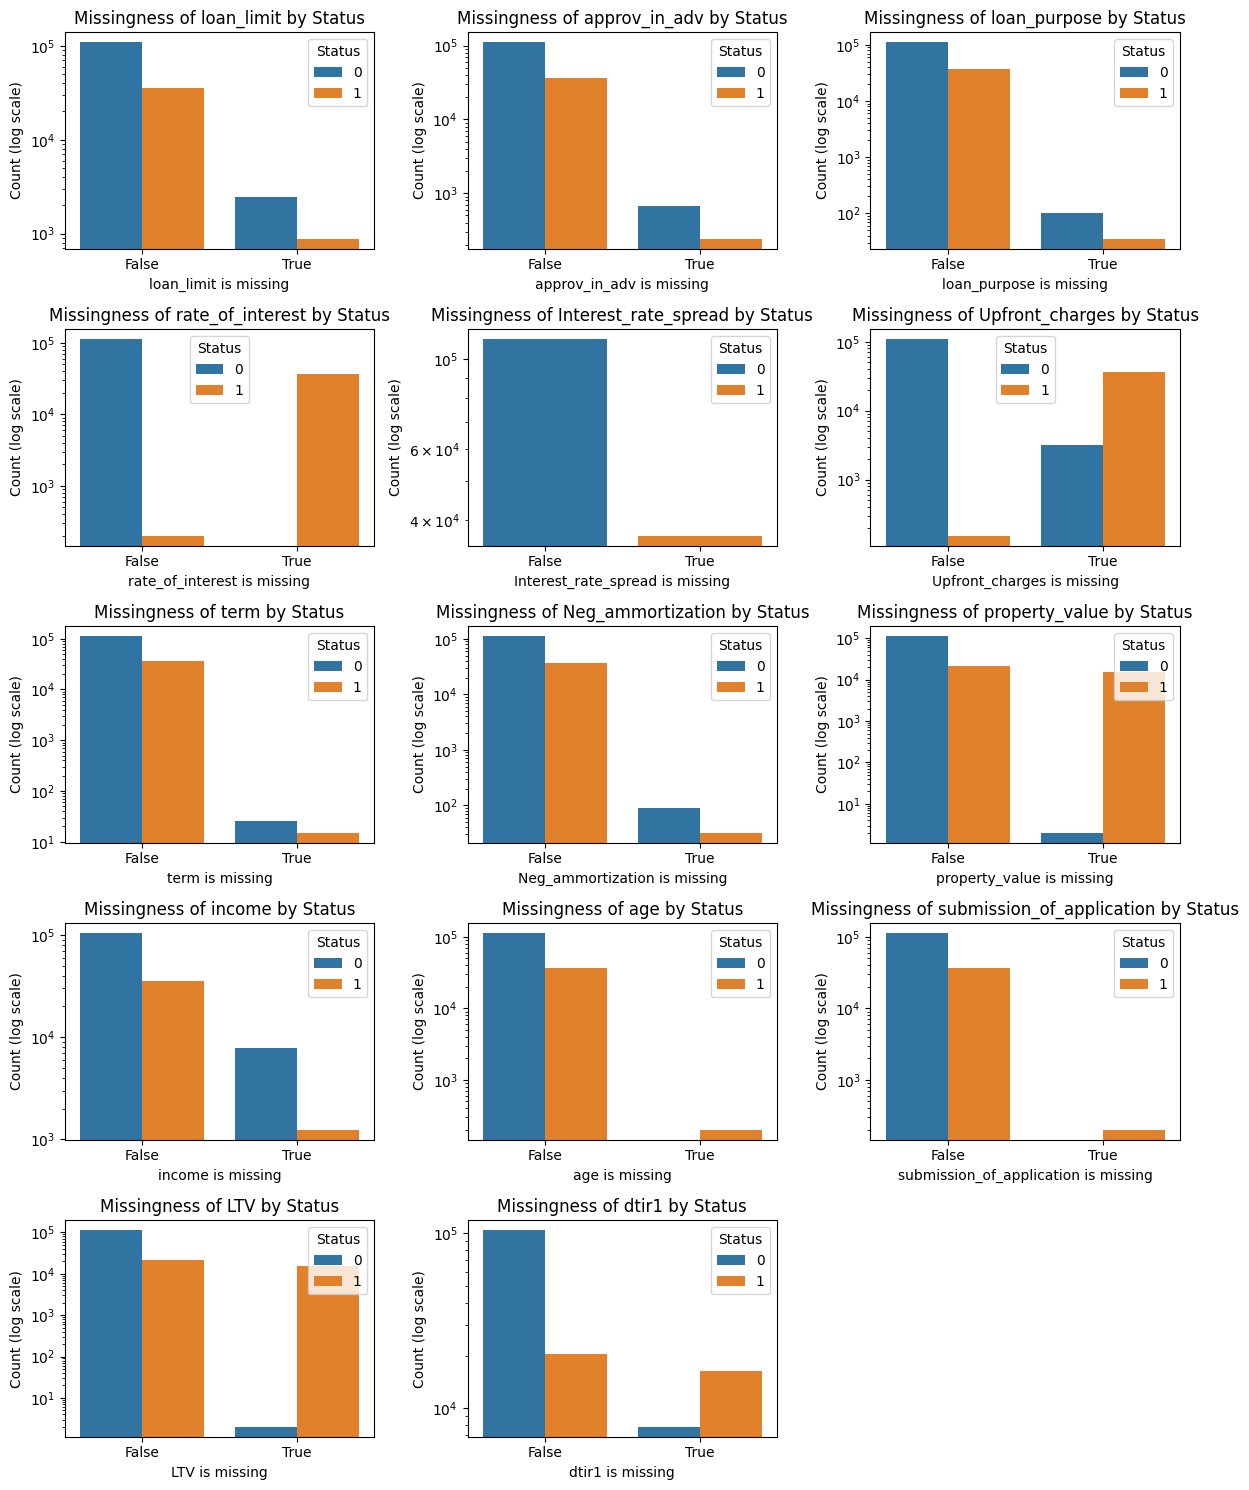

In [ ]:

cols_with_missing = df.columns[df.isnull().any()].tolist()

n_cols = 3
n_rows = (len(cols_with_missing) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()
for i, col in enumerate(cols_with_missing):
    missing_col_name = f'{col}_is_missing'
    df[missing_col_name] = df[col].isnull()

    sns.countplot(x=missing_col_name, hue='Status', data=df, ax=axes[i])
    axes[i].set_title(f'Missingness of {col} by Status')
    axes[i].set_xlabel(f'{col} is missing')
    axes[i].set_ylabel('Count (log scale)')
    axes[i].set_yscale('log')

    df.drop(columns=[missing_col_name], inplace=True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<div dir="rtl">

- بعض المتغيرات تحتوي على عدد قليل من القيم المفقودة وتظهر في كلا صنفي المتغير الهدف، مثل: loan_limit، approve_in_adv، loan_purpose، وincome.
- وبعض المتغيرات الأخرى تحتوي على عدد قليل من القيم المفقودة لكنها موجودة فقط في أحد الصنفين، ويمكن تعويضها مثل: age وsubmission_of_application.
- هناك قسم من المتغيرات يملك نسبة كبيرة من القيم المفقودة وتكون مفقودة فقط في أحد الصنفين، أي أن أحد الصنفين لديه بيانات لهذه المتغيرات بينما الآخر لا يملكها، مثل: "Interest_rate_spread", "rate_of_interest", و "Upfront_charges".
- وأخيرًا، يوجد قسم من المتغيرات التي تحتوي على قيم مفقودة في كلا الصنفين، لكن أحد الصنفين يحتوي على عدد أكبر من القيم المفقودة مقارنة بالصنف الآخر

</dir>

##Univariate Analysis - Categorical Data

In [354]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("عدد المتغيرات الفئوية:", len(categorical_cols))



عدد المتغيرات الفئوية: 21


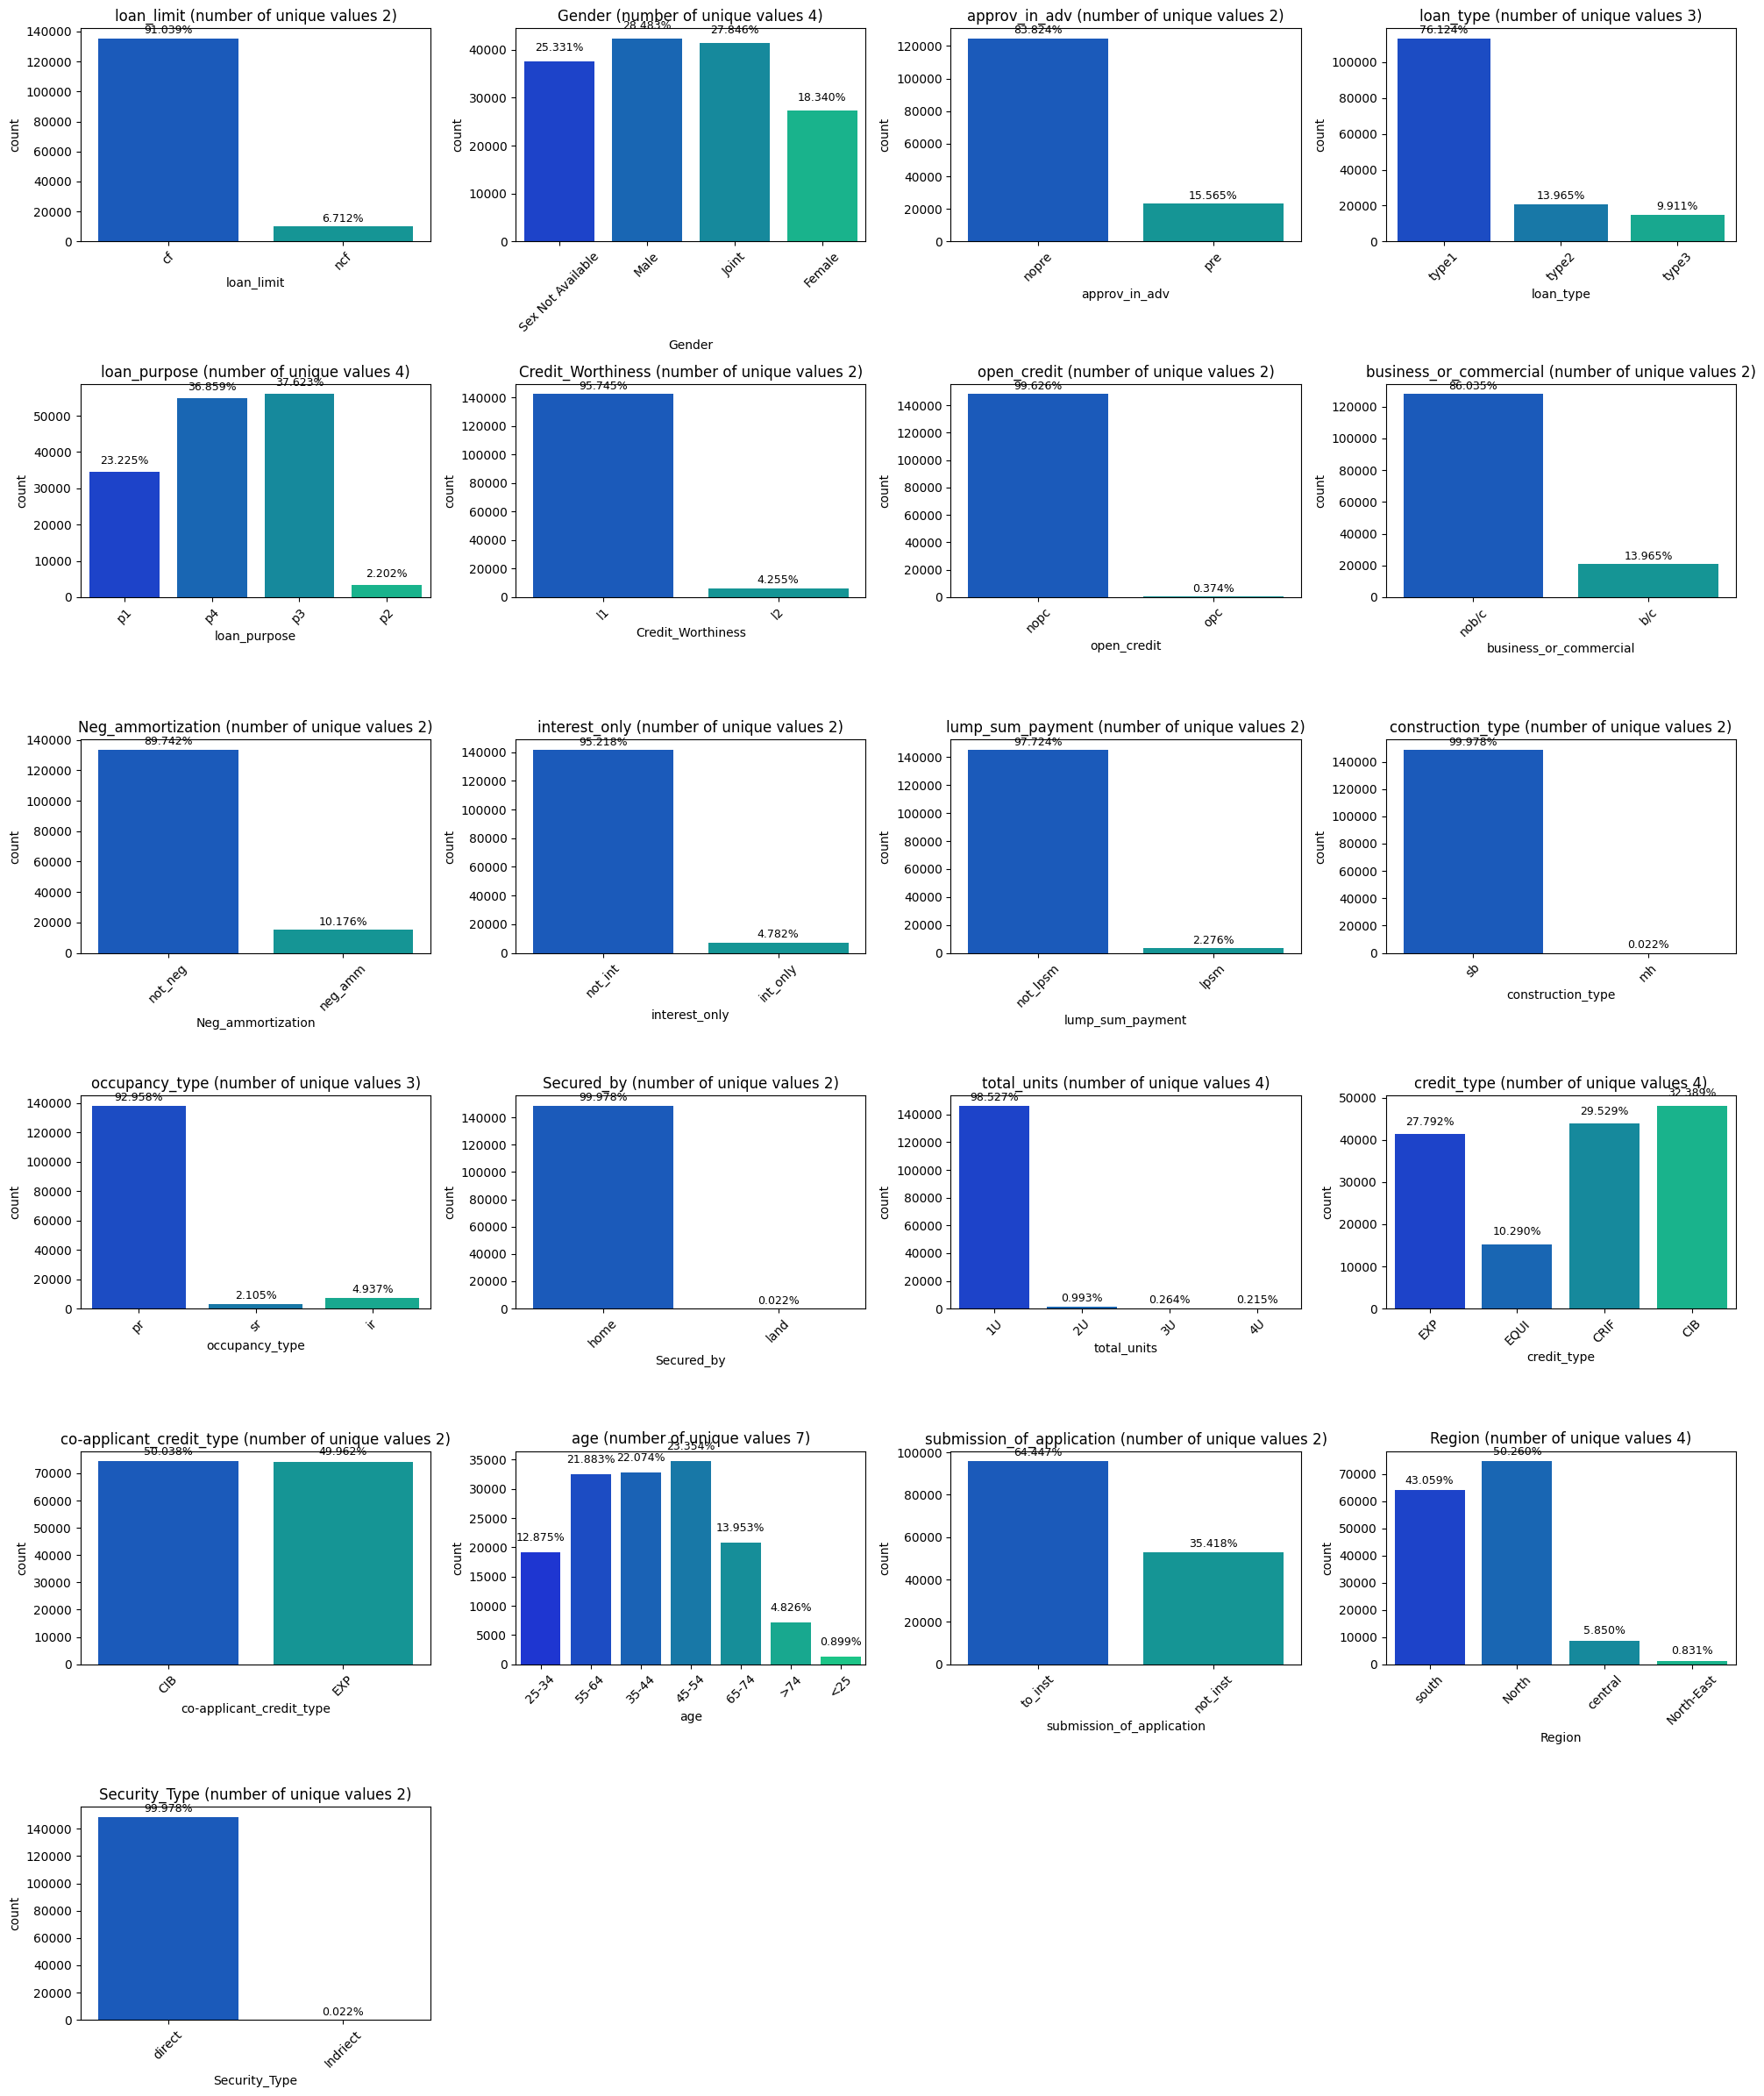

In [221]:
num_cols = len(categorical_cols)
n_cols = 4
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette='winter')
    ax.set_title(f"{col} (number of unique values {df[col].nunique()})")
    ax.tick_params(axis='x', rotation=45)

    total = len(df)
    counts = df[col].value_counts()

    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        percentage = 100 * height / total
        ax.text(x, height + total*0.01, f'{percentage:.3f}%', ha='center', va='bottom', fontsize=9)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<div dir="rtl">
- بعض المتغيرات الفئوية الثنائية اخد فئاتها اقل من 1 بالمئة يمكن محاولة ازالتها او ابقاءها واختبار تأثيرها بعد

<div>

##Bivariate Analysis

loan_amount  rate_of_interest
loan_amount          1.000000         -0.150844
rate_of_interest    -0.150844          1.000000

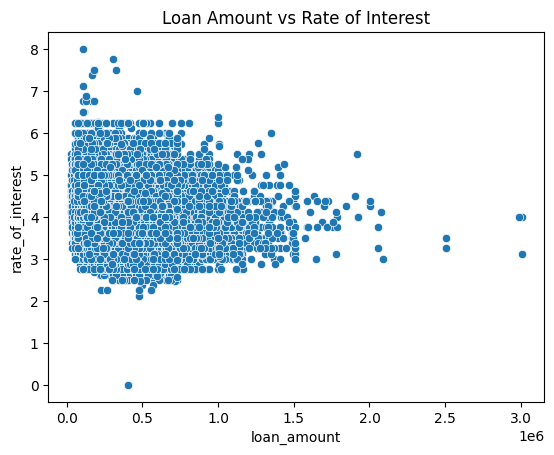

In [ ]:
sns.scatterplot(data=df, x='loan_amount', y='rate_of_interest')
plt.title('Loan Amount vs Rate of Interest')
df[['loan_amount', 'rate_of_interest']].corr()


<Axes: xlabel='property_value', ylabel='loan_amount'>

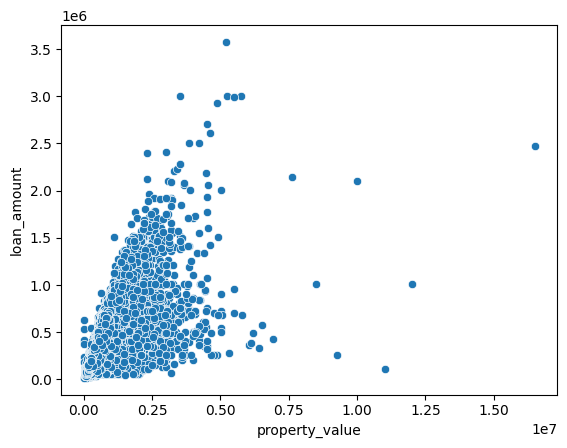

In [ ]:
sns.scatterplot(data=df, x='property_value', y='loan_amount')


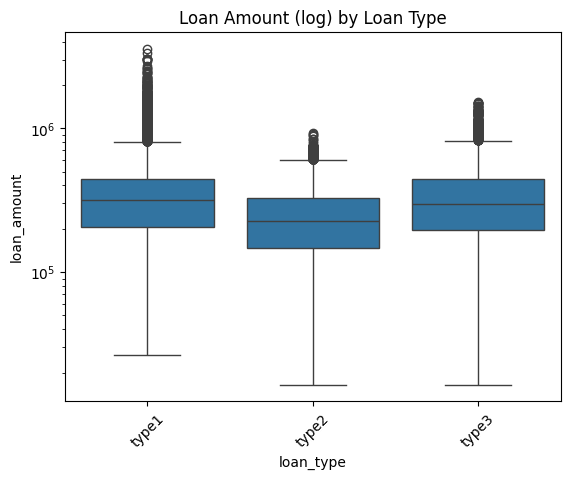

In [ ]:
sns.boxplot(data=df, x='loan_type', y='loan_amount')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Loan Amount (log) by Loan Type")
plt.show()


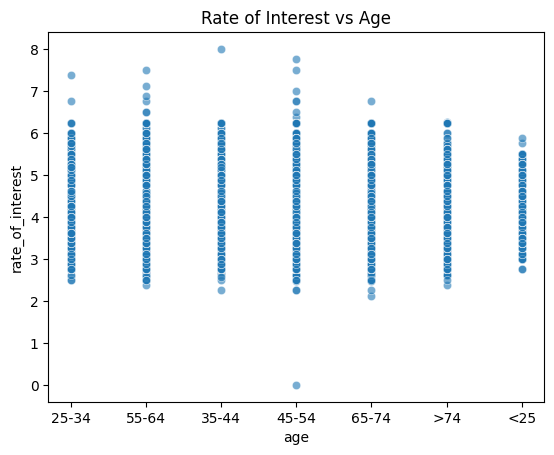

In [ ]:
sns.scatterplot(data=df, x='age', y='rate_of_interest', alpha=0.6)
plt.title('Rate of Interest vs Age')
plt.show()

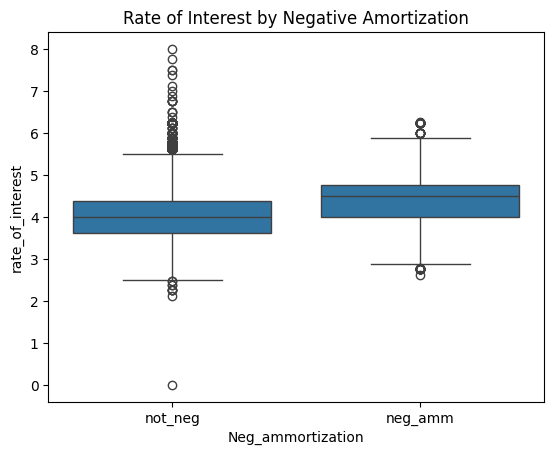

In [ ]:

sns.boxplot(data=df, x='Neg_ammortization', y='rate_of_interest')
plt.title('Rate of Interest by Negative Amortization')
plt.show()

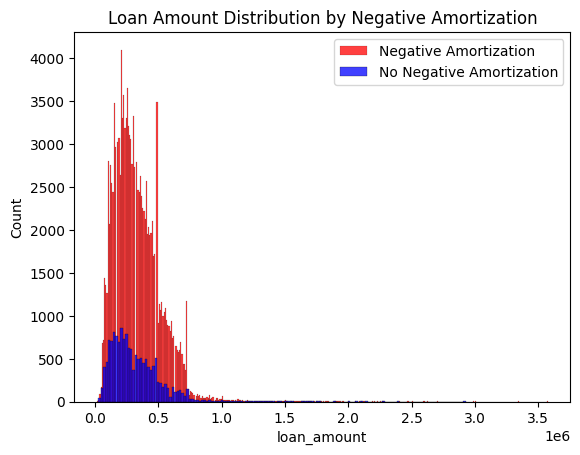

In [ ]:
# رسم histogram لمبلغ القرض بناءً على Neg_ammortization
sns.histplot(data=df[df['Neg_ammortization'] == "not_neg"], x='loan_amount', color='red', label='Negative Amortization')
sns.histplot(data=df[df['Neg_ammortization'] == "neg_amm"], x='loan_amount', color='blue', label='No Negative Amortization')
plt.legend()
plt.title('Loan Amount Distribution by Negative Amortization')
plt.show()

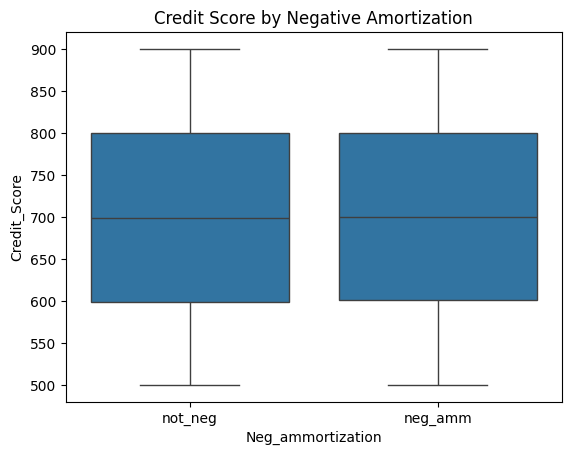

In [ ]:
# رسم boxplot للجدارة الائتمانية بناءً على Neg_ammortization
sns.boxplot(data=df, x='Neg_ammortization', y='Credit_Score')
plt.title('Credit Score by Negative Amortization')
plt.show()

loan_type           type1  type2  type3
Neg_ammortization                      
neg_amm             11492   2337   1300
not_neg            101583  18412  13425


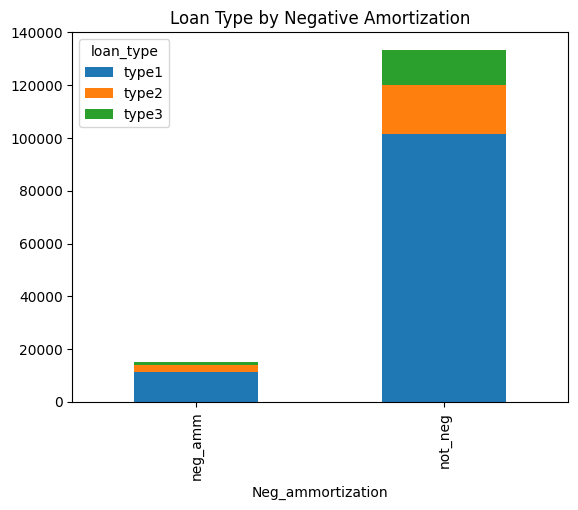

In [ ]:
# تكرار نوع القرض بناءً على Neg_ammortization
loan_type_by_neg_ammortization = pd.crosstab(df['Neg_ammortization'], df['loan_type'])
print(loan_type_by_neg_ammortization)

# رسم bar chart
loan_type_by_neg_ammortization.plot(kind='bar', stacked=True)
plt.title('Loan Type by Negative Amortization')
plt.show()

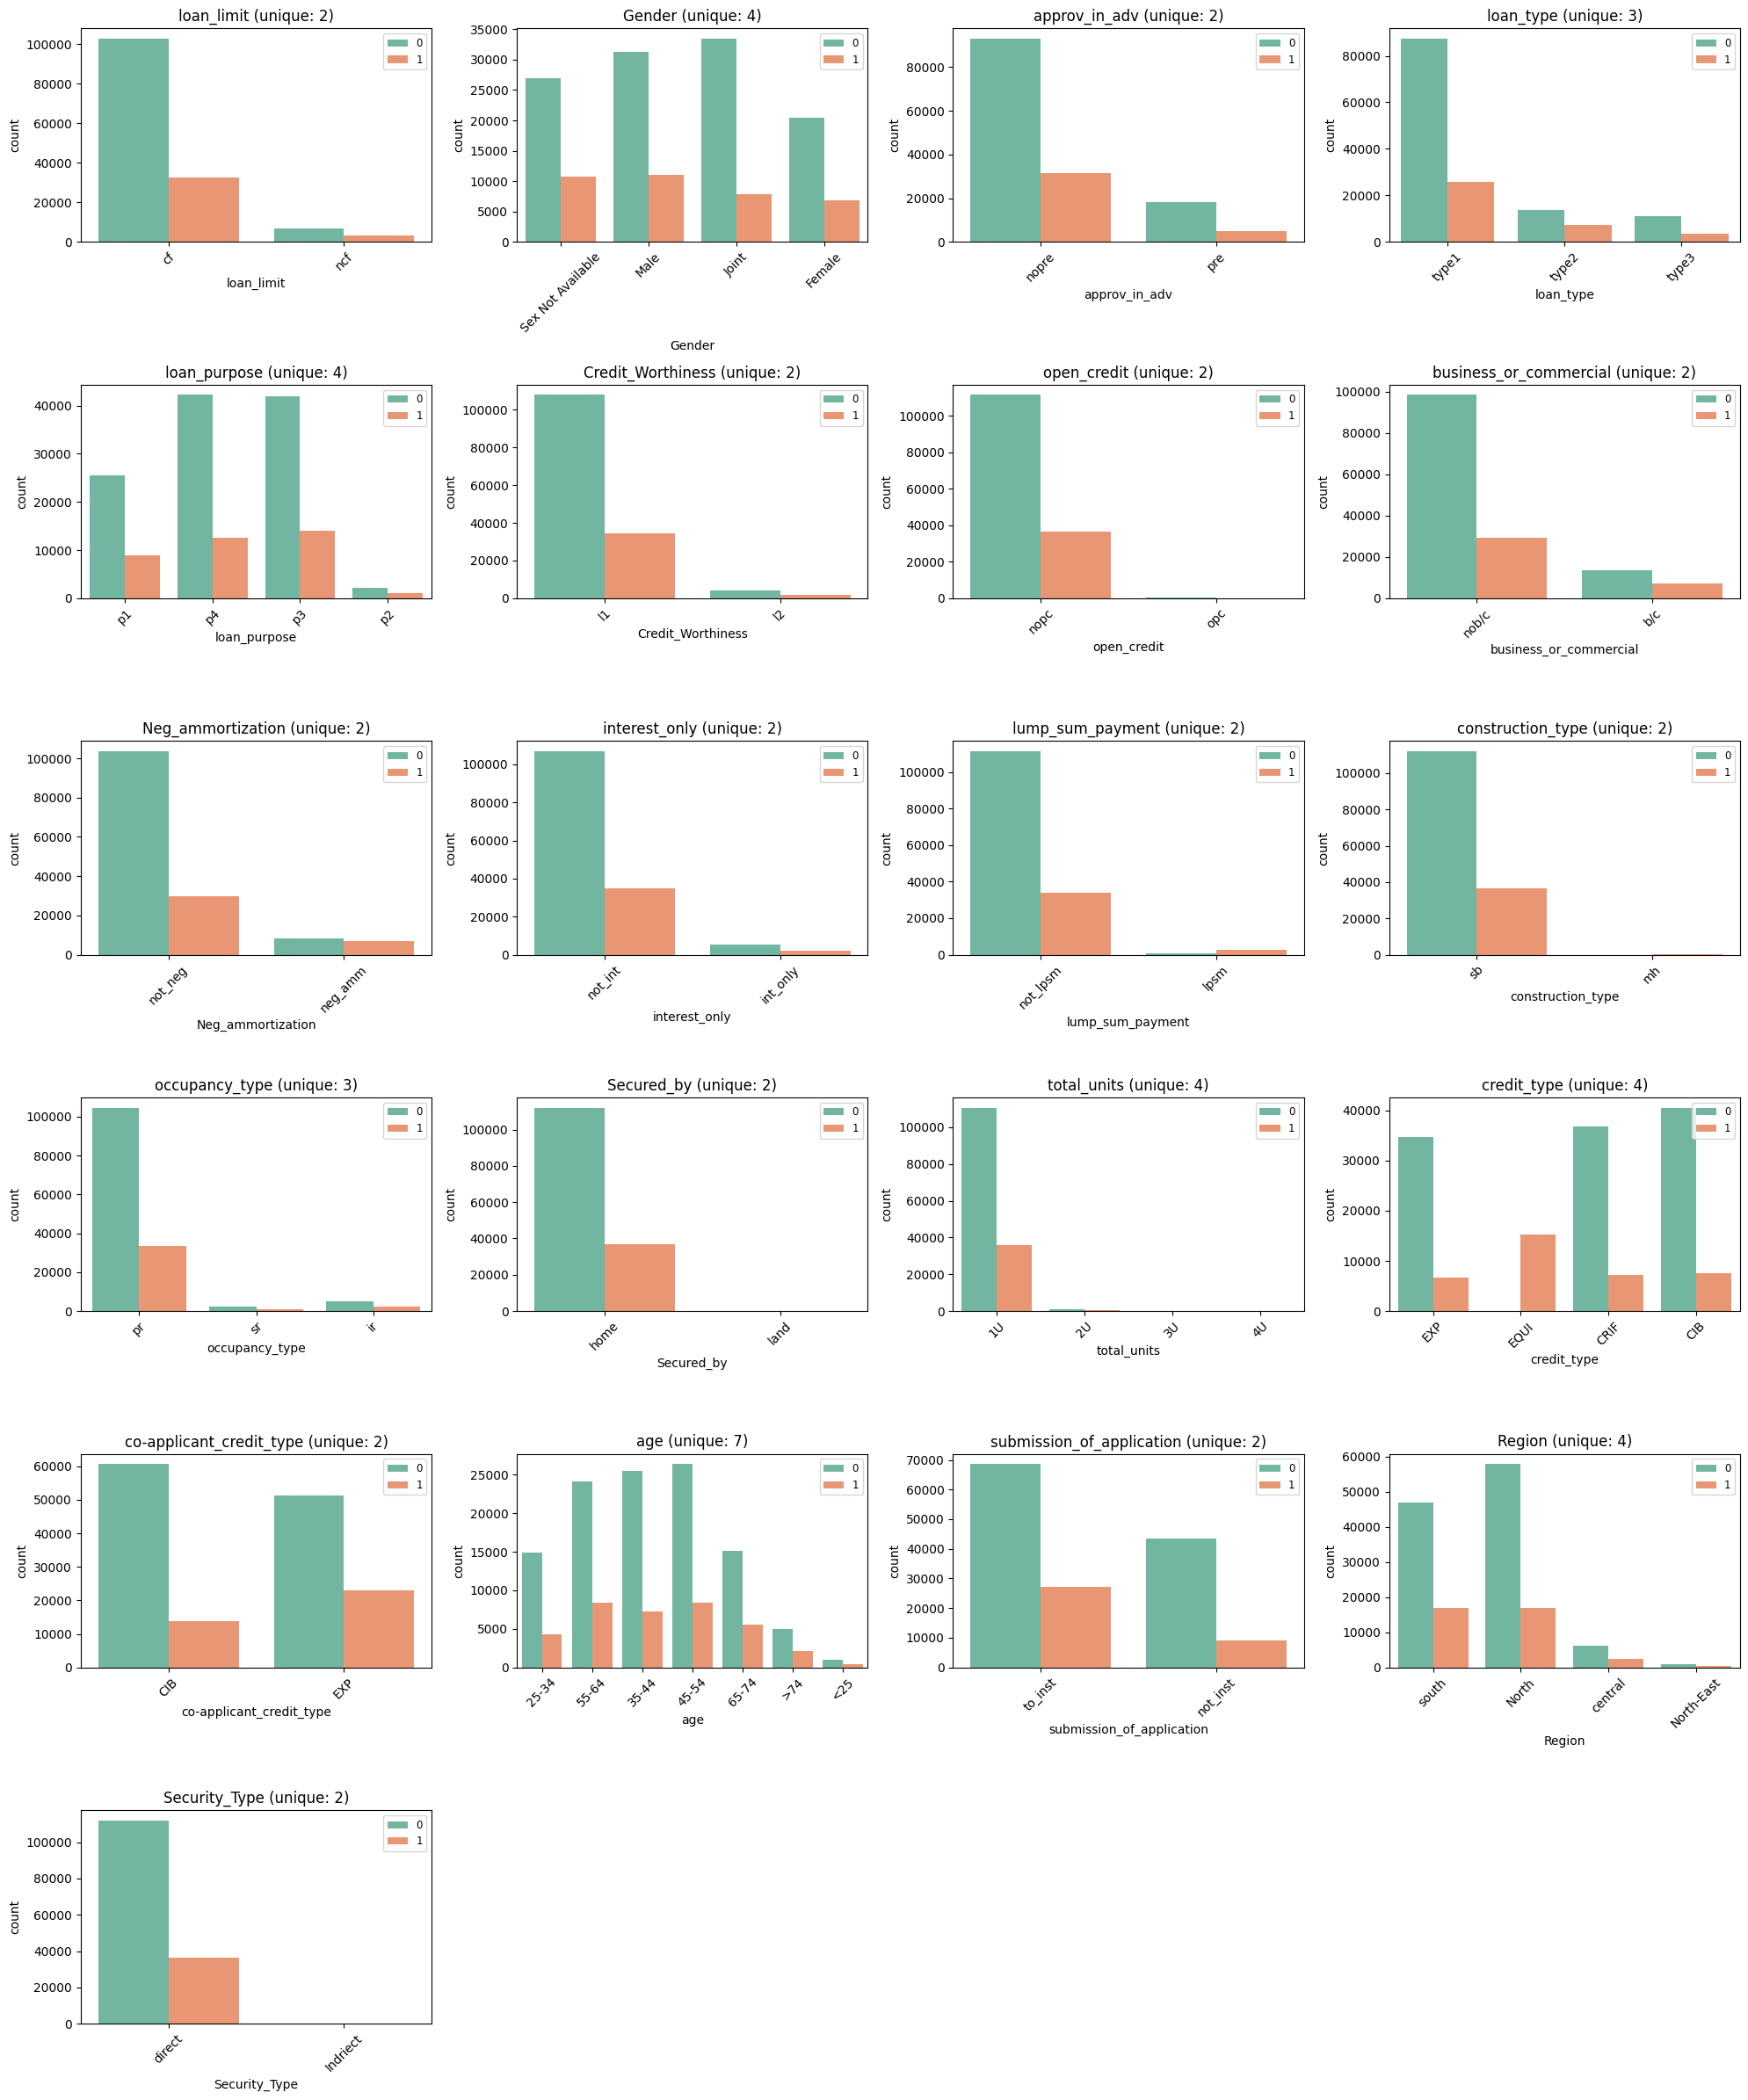

In [224]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

num_cols = len(categorical_cols)
n_cols = 4
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue='Status', ax=ax, palette='Set2')
    ax.set_title(f"{col} (unique: {df[col].nunique()})")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc='upper right', fontsize='small')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Loan Status by age')

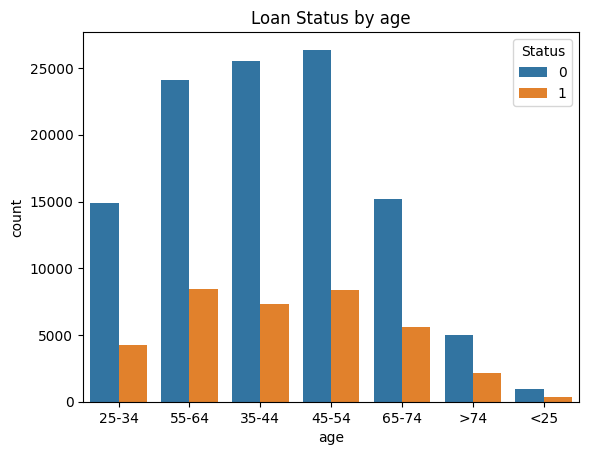

In [ ]:
sns.countplot(data=df, x='age', hue='Status')
plt.title('Loan Status by age')


Text(0.5, 1.0, 'Loan Status by Gender')

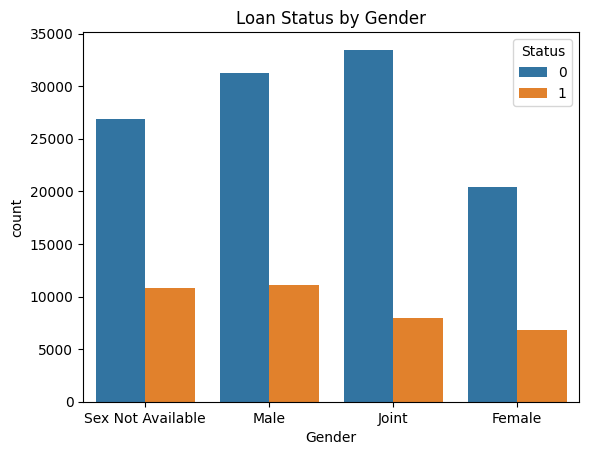

In [ ]:
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Loan Status by Gender')


Text(0.5, 1.0, 'LTV vs Loan Status (Limited Y-axis)')

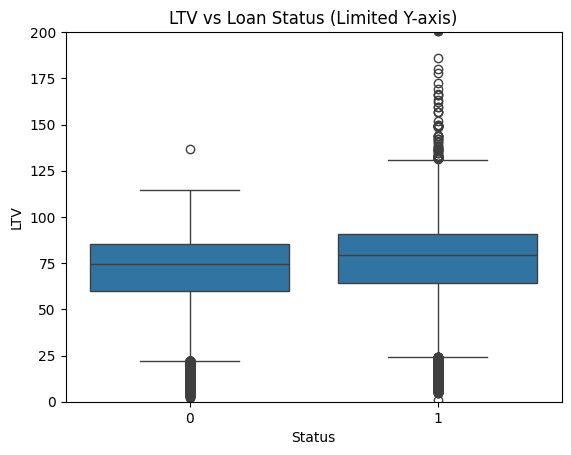

In [ ]:
sns.boxplot(data=df, x='Status', y='LTV')
plt.ylim(0, 200)  # تحديد النطاق الذي تريد عرضه
plt.title('LTV vs Loan Status (Limited Y-axis)')


<Axes: xlabel='Status', ylabel='Credit_Score'>

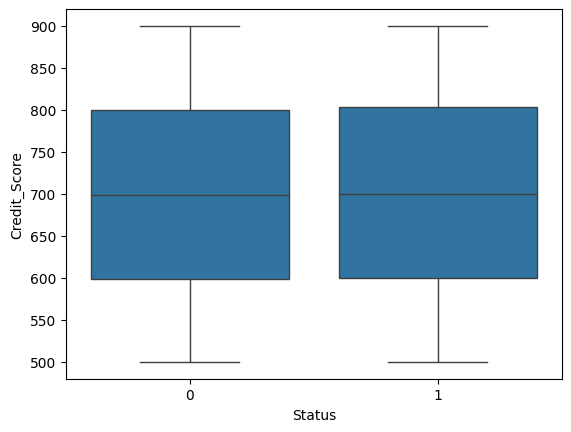

In [ ]:
sns.boxplot(data=df, x='Status', y='Credit_Score')


([0, 1, 2, 3],
 [Text(0, 0, 'p1'), Text(1, 0, 'p4'), Text(2, 0, 'p3'), Text(3, 0, 'p2')])

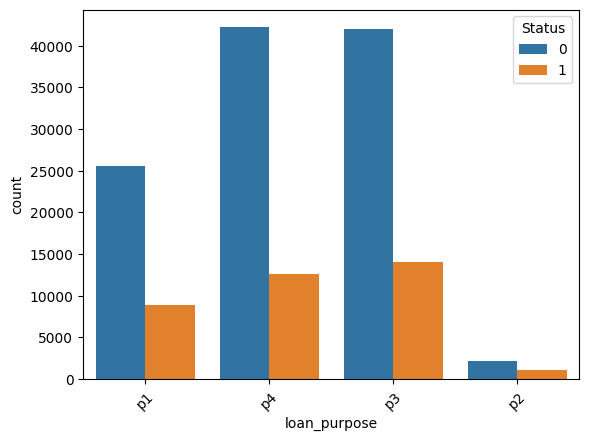

In [ ]:
sns.countplot(data=df, x='loan_purpose', hue='Status')
plt.xticks(rotation=45)


##Multivariate Analysis

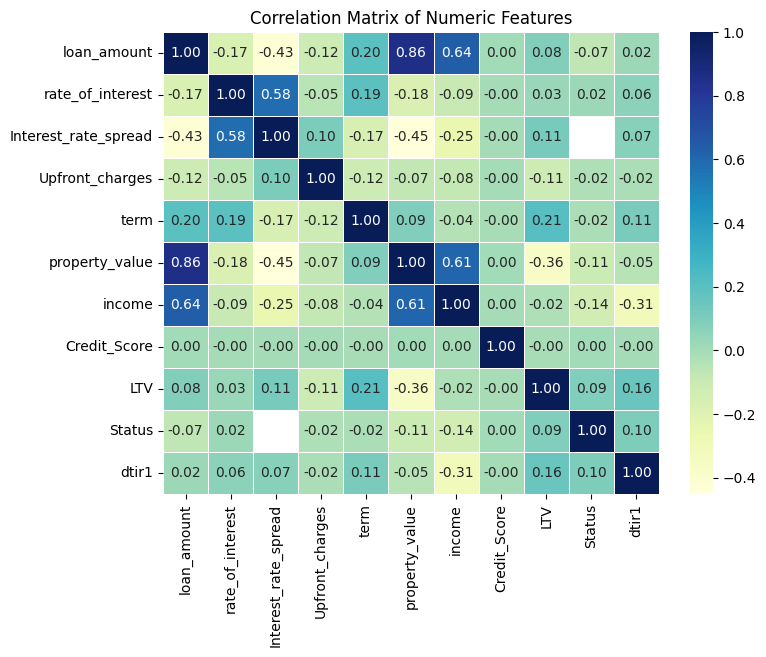

In [214]:
numeric_df = df.select_dtypes(include=np.number)
cols_to_exclude_corr = ['ID', 'year']
numeric_df_corr = numeric_df.drop(columns=cols_to_exclude_corr, errors='ignore')

correlation_matrix = numeric_df_corr.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


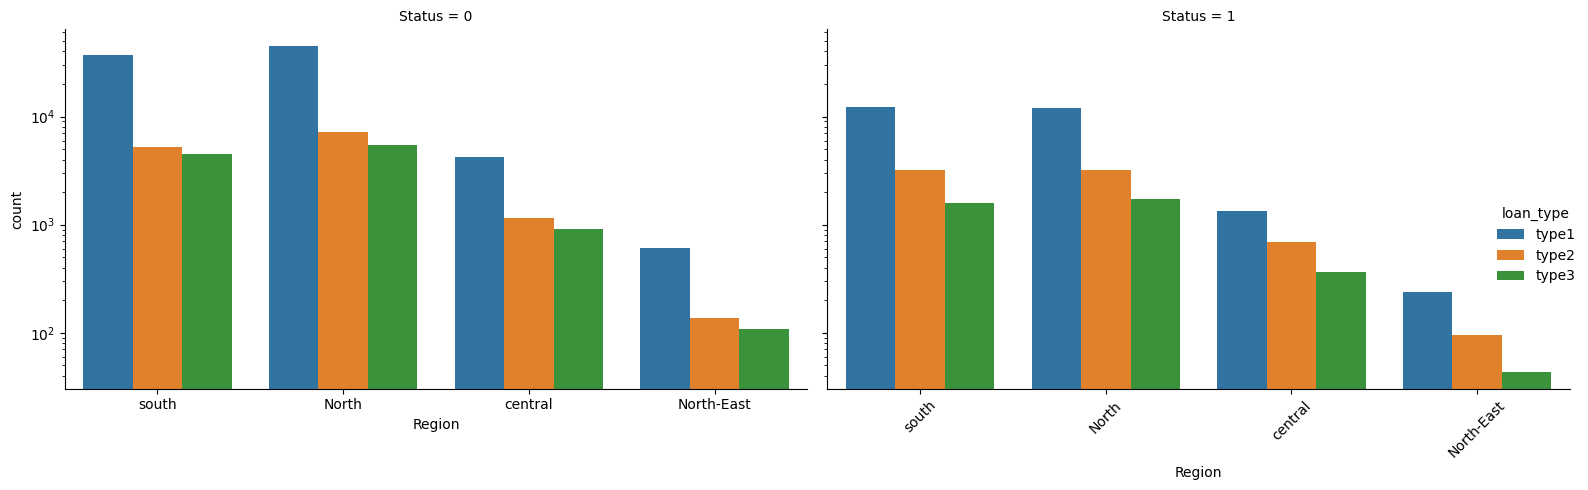

In [ ]:
g = sns.catplot(
    data=df, x='Region', hue='loan_type', col='Status',
    kind='count', height=5, aspect=1.5
)

g.set(yscale="log")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

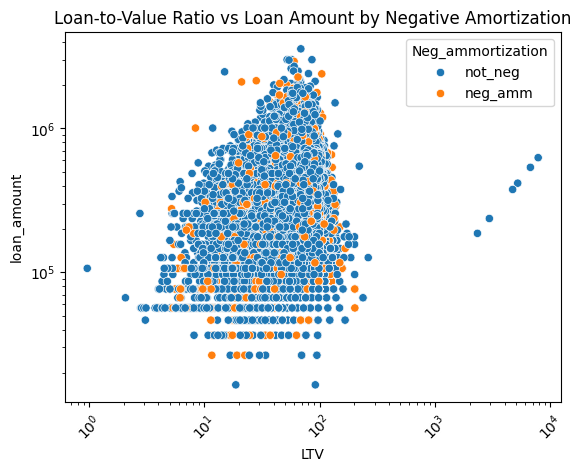

In [ ]:
# رسم scatter plot لنسبة القرض إلى قيمة العقار بناءً على Neg_ammortization
h=sns.scatterplot(data=df, x='LTV', y='loan_amount', hue='Neg_ammortization')
plt.title('Loan-to-Value Ratio vs Loan Amount by Negative Amortization')

h.set(xscale="log")
h.set(yscale="log")
plt.xticks(rotation=45)
plt.show()

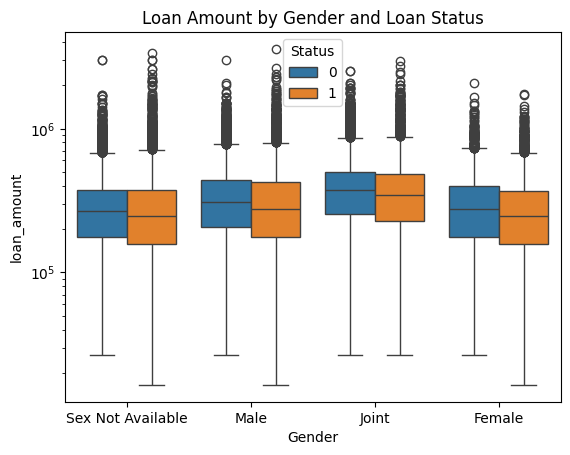

In [ ]:
sns.boxplot(data=df, x='Gender', y='loan_amount', hue='Status')
plt.title('Loan Amount by Gender and Loan Status')
plt.yscale('log')
plt.show()


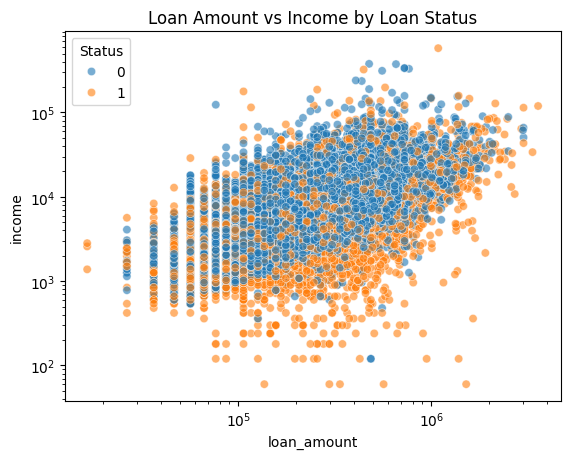

In [ ]:
sns.scatterplot(data=df, x='loan_amount', y='income', hue='Status', alpha=0.6)
plt.title('Loan Amount vs Income by Loan Status')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    if df[col].nunique() < 30:
        contingency = pd.crosstab(df[col], df['Status'])
        chi2, p, dof, ex = chi2_contingency(contingency)
        print(f"{col}: Chi2 = {chi2:.2f}, p = {p:.4f}")


loan_limit: Chi2 = 427.40, p = 0.0000
Gender: Chi2 = 1043.60, p = 0.0000
approv_in_adv: Chi2 = 206.40, p = 0.0000
loan_type: Chi2 = 1309.96, p = 0.0000
loan_purpose: Chi2 = 240.21, p = 0.0000
Credit_Worthiness: Chi2 = 180.42, p = 0.0000
open_credit: Chi2 = 14.43, p = 0.0001
business_or_commercial: Chi2 = 1272.81, p = 0.0000
Neg_ammortization: Chi2 = 3610.21, p = 0.0000
interest_only: Chi2 = 28.49, p = 0.0000
lump_sum_payment: Chi2 = 5237.83, p = 0.0000
construction_type: Chi2 = 96.91, p = 0.0000
occupancy_type: Chi2 = 131.83, p = 0.0000
Secured_by: Chi2 = 96.91, p = 0.0000
total_units: Chi2 = 123.99, p = 0.0000
credit_type: Chi2 = 52135.28, p = 0.0000
co-applicant_credit_type: Chi2 = 3092.39, p = 0.0000
age: Chi2 = 374.50, p = 0.0000
submission_of_application: Chi2 = 2171.71, p = 0.0000
Region: Chi2 = 380.46, p = 0.0000
Security_Type: Chi2 = 96.91, p = 0.0000


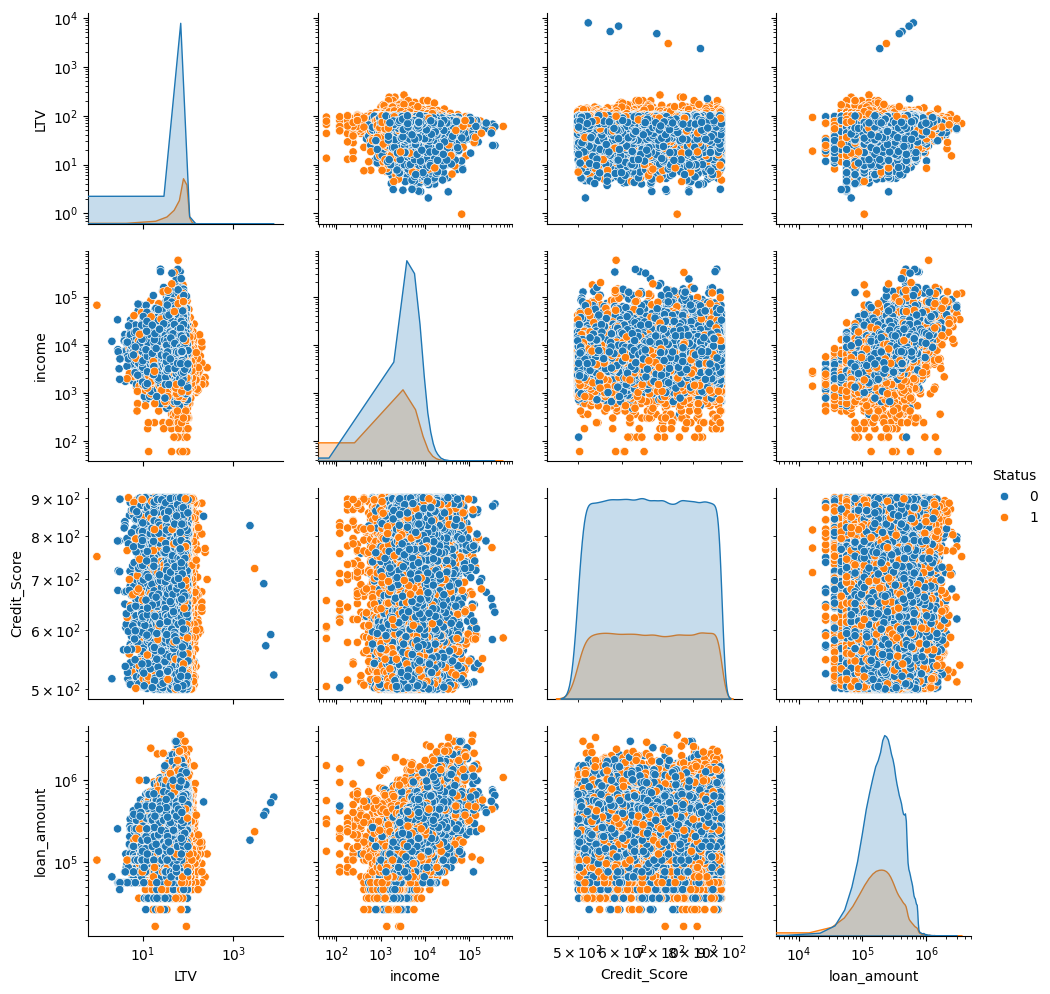

In [ ]:
g = sns.pairplot(
    data=df,
    vars=['LTV', 'income', 'Credit_Score', 'loan_amount'],
    hue='Status'
)

for ax in g.axes.flat:
    ax.set(xscale="log", yscale="log")

plt.show()

#preprossing & handeling missing value

In [47]:
df['total_units'] = df['total_units'].replace({'2U': '2U+', '3U': '2U+', '4U': '2U+'})

##Treating outliear

In [48]:
for col in ['loan_amount', 'Upfront_charges', 'income', 'property_value']:
    # df = df[df[col] > 0]
    df[f'{col}_log'] = np.log1p(df[col])


In [49]:
def categorize_term(term):
    if pd.isna(term):
        return np.nan
    elif term <= 180:
        return 0
    elif term < 360:
        return 1
    elif term == 360:
        return 2

df['term_cat'] = df['term'].apply(categorize_term)


In [50]:
lower_bound =df['loan_amount_log'].quantile(0.01)
upper_bound = df['loan_amount_log'].quantile(0.99)

df['loan_amount_log'] = df['loan_amount_log'].clip(lower=lower_bound, upper=upper_bound)


In [51]:
lower_bound = df['Upfront_charges_log'].quantile(0.08)
upper_bound = df['Upfront_charges_log'].quantile(0.98)

df['Upfront_charges_log'] = df['Upfront_charges_log'].clip(lower=lower_bound, upper=upper_bound)

In [52]:
lower_bound = df['income_log'].quantile(0.02)
upper_bound = df['income_log'].quantile(0.99)


df['income_log'] = df['income_log'].clip(lower=lower_bound, upper=upper_bound)


In [53]:
lower_bound = df['property_value_log'].quantile(0.01)
upper_bound = df['property_value_log'].quantile(0.99)

df['property_value_log'] = df['property_value_log'].clip(lower=lower_bound, upper=upper_bound)


In [54]:
lower_bound = df['LTV'].quantile(0.08)
upper_bound = df['LTV'].quantile(0.98)


df['LTV'] = df['LTV'].clip(lower=lower_bound, upper=upper_bound)


In [55]:
lower_bound = df['rate_of_interest'].quantile(0.01)
upper_bound = df['rate_of_interest'].quantile(0.98)

df['rate_of_interest'] = df['rate_of_interest'].clip(lower=lower_bound, upper=upper_bound)


In [56]:
lower_bound = df['Interest_rate_spread'].quantile(0.01)
upper_bound = df['Interest_rate_spread'].quantile(0.98)

df['Interest_rate_spread'] = df['Interest_rate_spread'].clip(lower=lower_bound, upper=upper_bound)


In [57]:
lower_bound = df['dtir1'].quantile(0.02)
upper_bound = df['dtir1'].quantile(0.99)

df['dtir1'] = df['dtir1'].clip(lower=lower_bound, upper=upper_bound)


In [58]:
df=df.drop(columns=['loan_amount', 'Upfront_charges', 'income', 'property_value'])

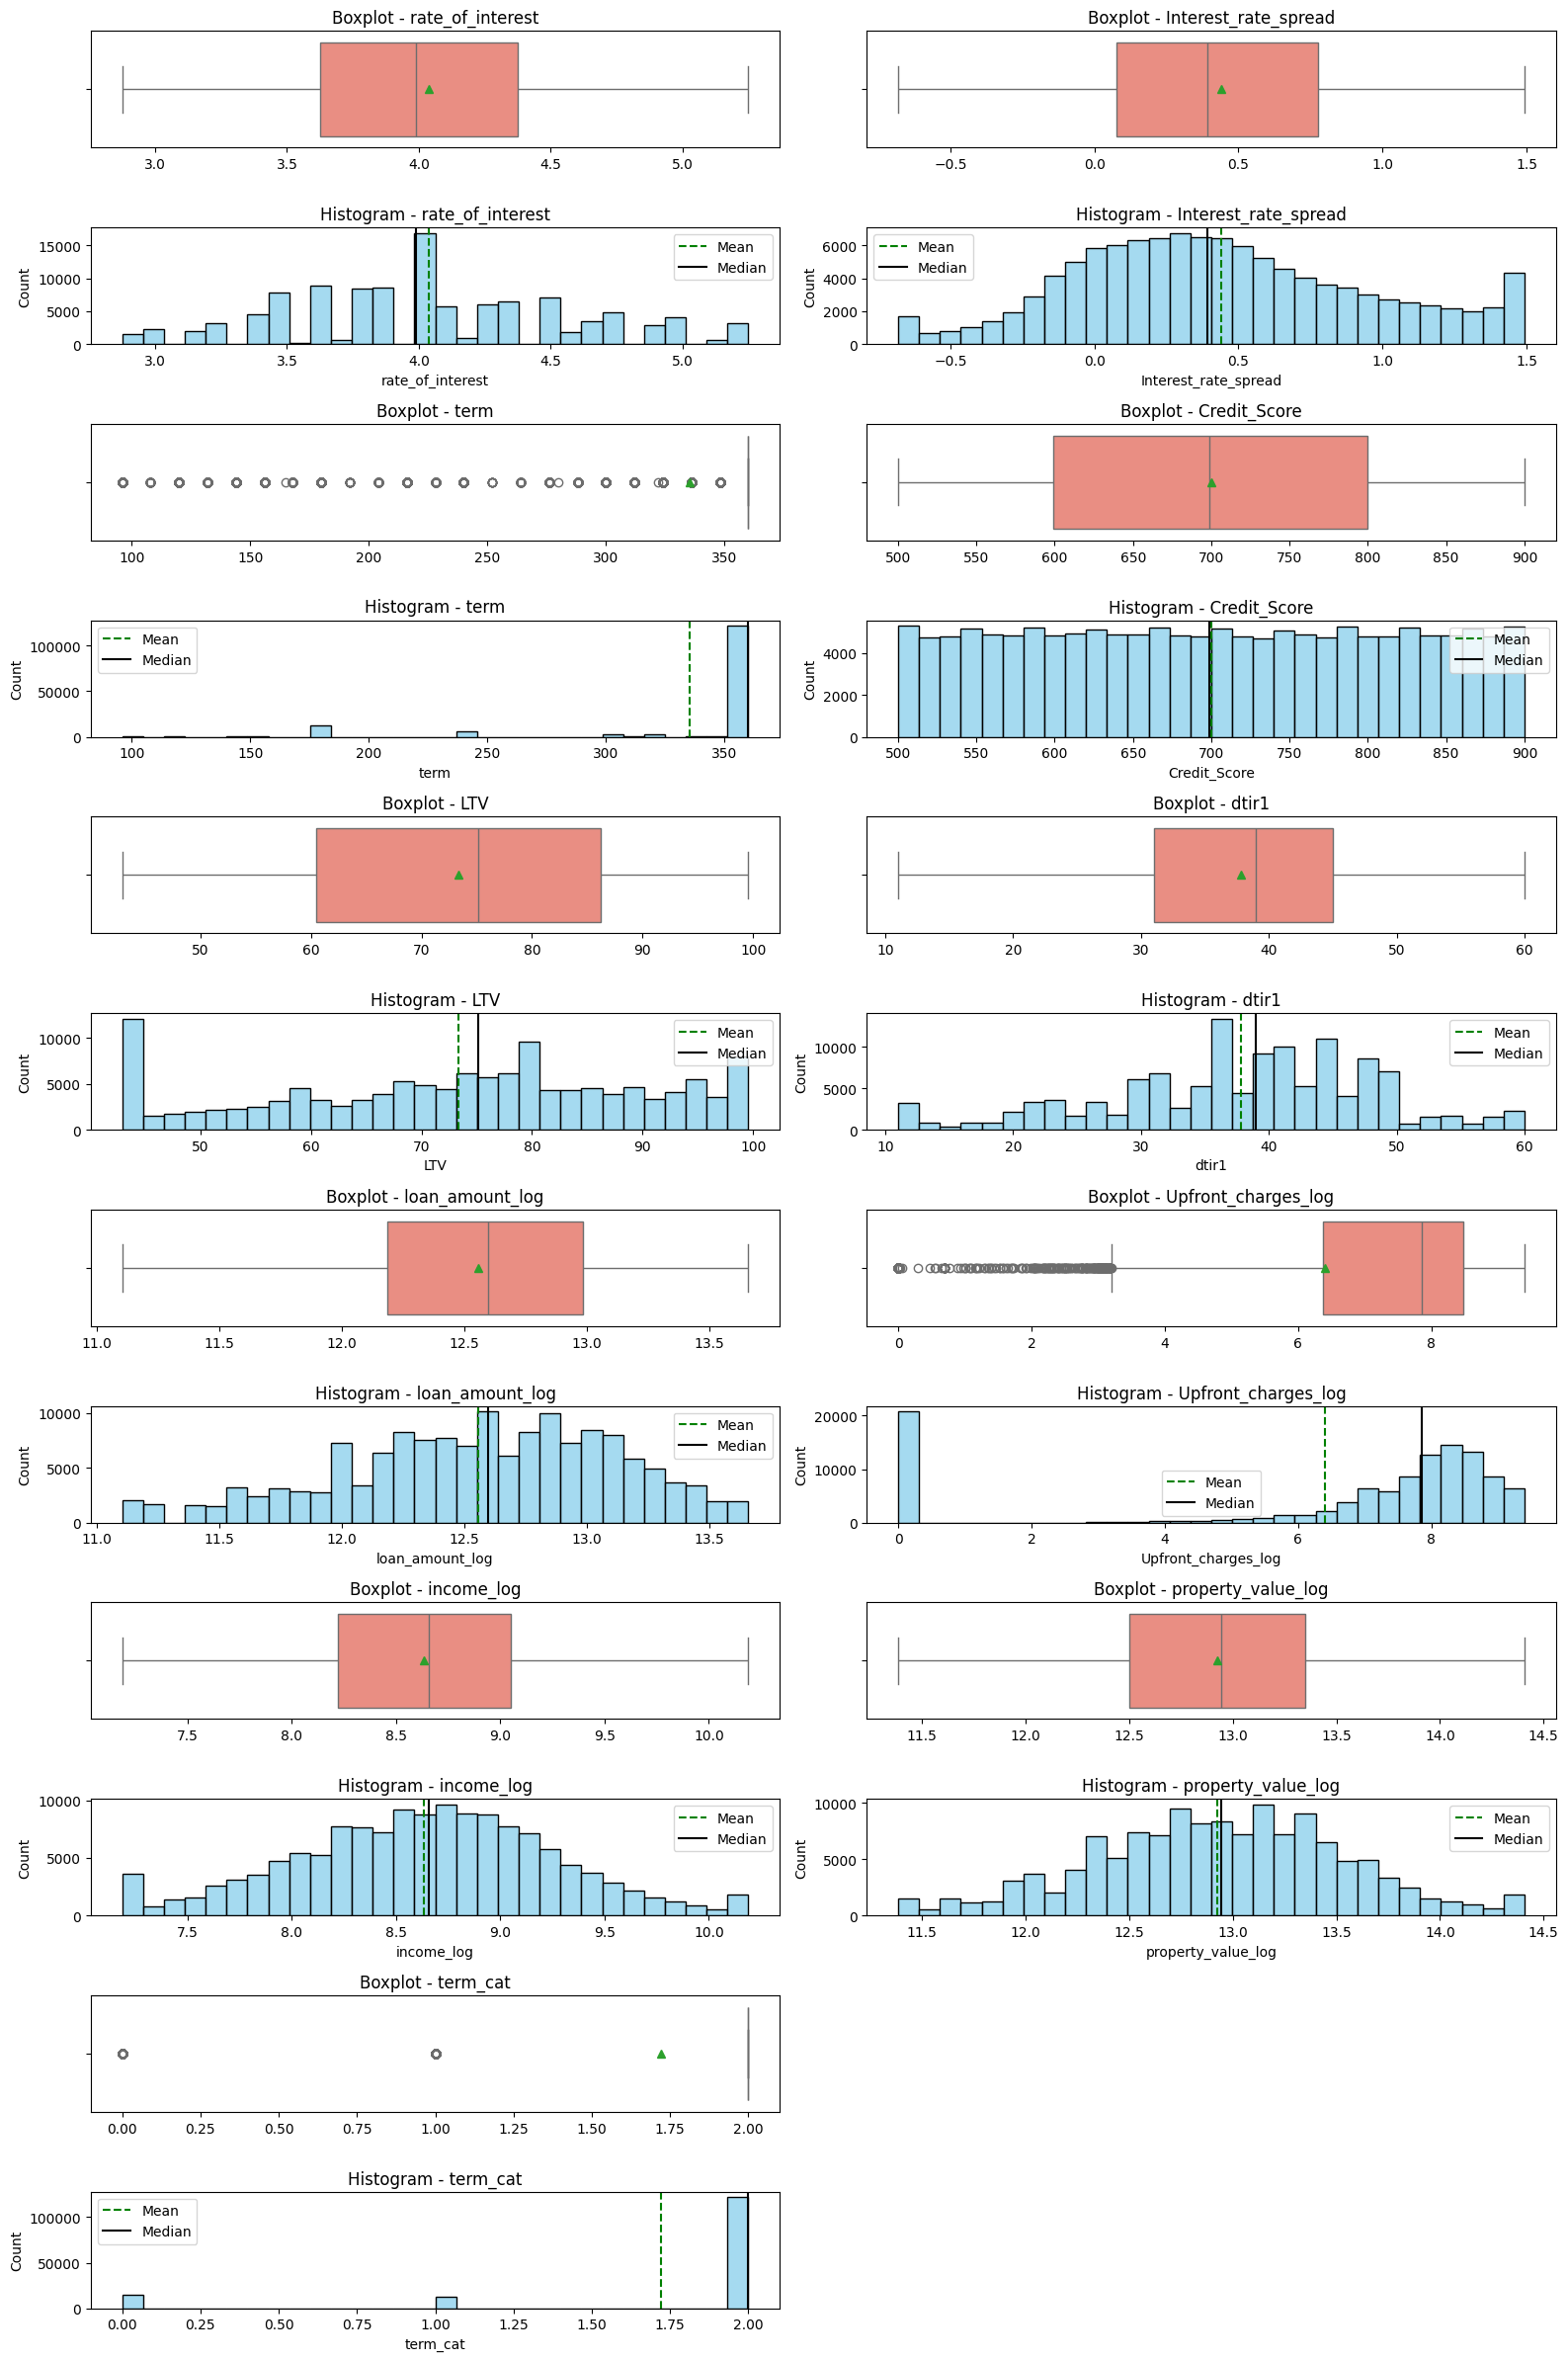

In [59]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['ID', 'year', 'Status']
plot_cols = [col for col in numeric_cols if col not in cols_to_exclude]

n_cols = 2
n_rows = (len(plot_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(16, n_rows * 4), sharex=False)
axes = axes.reshape(n_rows * 2, n_cols)

for i, col in enumerate(plot_cols):
    row = (i // n_cols) * 2
    col_pos = i % n_cols

    sns.boxplot(
        x=df[col].dropna(),
        ax=axes[row, col_pos],
        showmeans=True,
        color='salmon'
    )
    axes[row, col_pos].set_title(f"Boxplot - {col}")
    axes[row, col_pos].set_xlabel("")

    sns.histplot(
        df[col].dropna(),
        kde=False,
        ax=axes[row + 1, col_pos],
        color='skyblue',
        bins=30
    )
    axes[row + 1, col_pos].axvline(df[col].mean(), color='green', linestyle='--', label='Mean')
    axes[row + 1, col_pos].axvline(df[col].median(), color='black', linestyle='-', label='Median')
    axes[row + 1, col_pos].legend()
    axes[row + 1, col_pos].set_title(f"Histogram - {col}")


total_plots = len(plot_cols)
extra_plots = (n_rows * n_cols) - total_plots
for j in range(extra_plots):
    fig.delaxes(axes[-1, -1 - j])
    fig.delaxes(axes[-2, -1 - j])

plt.tight_layout()
plt.show()


##Handling missing value

In [73]:
# categorical_cols = df.select_dtypes(include='object').columns.tolist()
# print("عدد المتغيرات الفئوية:", len(categorical_cols))
# categorical_cols


In [74]:
# missing = df.isnull().sum()
# missing = missing[missing > 0].sort_values(ascending=False)
# missing_info = pd.DataFrame({
#     'missing_count': missing,
#     'dtype': df[missing.index].dtypes
# })

# print(missing_info)


In [75]:
# df=df.dropna(axis=1)
df=df.drop(columns=[
    "ID","year","term_cat","term",
    "Interest_rate_spread",
    "rate_of_interest",
    "Upfront_charges_log",
    "property_value_log",
     "Security_Type",
     "Secured_by",
     "open_credit",
     "construction_type",
    # "LTV",
    # "dtir1",

])

In [76]:

X = df.drop(columns=['Status'])
y = df['Status']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

numeric_cols = [col for col in numeric_cols if col in X_train.columns]
categorical_cols = [col for col in categorical_cols if col in X_train.columns]

In [77]:
class AddMissingIndicatorsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.missing_cols = []

    def fit(self, X, y=None):
        self.missing_cols = [col for col in self.columns if X[col].isna().any()]
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.missing_cols:
            X_copy[f"{col}_missing"] = X_copy[col].isna().astype(int)
        return X_copy


In [78]:
# class GroupedMeanImputer(BaseEstimator, TransformerMixin):
#     def __init__(self, columns):
#         self.columns = columns
#         self.fill_values_ = {}

#     def fit(self, X, y):
#         df = X.copy()
#         df['Status'] = y.values
#         self.fill_values_ = {
#             col: df.groupby('Status')[col].median().to_dict()
#             for col in self.columns
#         }
#         return self

#     def transform(self, X):
#         df = X.copy()
#         for col in self.columns:
#             global_median = df[col].median()
#             df[col] = df[col].fillna(global_median)
#         return df

In [79]:
# class CategoricalImputerWithTarget(BaseEstimator, TransformerMixin):
#     def __init__(self, categorical_cols):
#         self.categorical_cols = categorical_cols
#         self.fill_values = {}

#     def fit(self, X, y):
#         df = X.copy()
#         df['Status'] = y.values
#         self.fill_values = {}
#         for col in self.categorical_cols:
#             mode_per_class = (
#                 df.groupby('Status')[col]
#                 .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
#                 .to_dict()
#             )
#             self.fill_values[col] = mode_per_class
#         return self

#     def transform(self, X):
#         df = X.copy()
#         for col in self.categorical_cols:
#             fallback_mode = pd.Series(df[col]).mode().iloc[0] if not pd.Series(df[col]).mode().empty else "Unknown"
#             df[col] = df[col].fillna(fallback_mode)
#         return df

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

class RegressionImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.models = {}
        self.global_medians = {}

    def fit(self, X, y=None):
        df = X.copy()
        for col in self.columns:
            train_df = df[df[col].notnull()]
            features = train_df.drop(columns=self.columns)
            if col in features.columns:
                features = features.drop(columns=[col])
            features = features.select_dtypes(include=[np.number])
            target = train_df[col]

            if len(target) > 0 and features.shape[1] > 0:
                model = LinearRegression()
                model.fit(features, target)
                self.models[col] = model
                self.global_medians[col] = df[col].median()
            else:
                self.models[col] = None
                self.global_medians[col] = df[col].median()
        return self

    def transform(self, X):
        df = X.copy()
        for col in self.columns:
            model = self.models.get(col)
            if model is None:
                df[col] = df[col].fillna(self.global_medians[col])
                continue

            missing_mask = df[col].isnull()
            if missing_mask.sum() == 0:
                continue

            features = df.loc[missing_mask].drop(columns=self.columns)
            if col in features.columns:
                features = features.drop(columns=[col])
            features = features.select_dtypes(include=[np.number])

            for feat_col in features.columns:
                if features[feat_col].isnull().any():
                    median_val = df[feat_col].median()
                    features[feat_col] = features[feat_col].fillna(median_val)

            preds = model.predict(features)
            df.loc[missing_mask, col] = preds
        return df

class ModeCategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        self.categorical_cols = categorical_cols
        self.fill_values = {}

    def fit(self, X, y=None):
        df = X.copy()
        self.fill_values = {
            col: df[col].mode().iloc[0] if not df[col].mode().empty else "Unknown"
            for col in self.categorical_cols
        }
        return self

    def transform(self, X):
        df = X.copy()
        for col in self.categorical_cols:
            fill_value = self.fill_values.get(col, "Unknown")
            df[col] = df[col].fillna(fill_value)
        return df


##Encoding

In [81]:
binary_cols = ["loan_limit", "submission_of_application", "approv_in_adv",
    'business_or_commercial', 'Neg_ammortization',
    'interest_only', 'lump_sum_payment',
     'co-applicant_credit_type',
]

nominal_cols = [
   'Gender', 'loan_type', 'loan_purpose',
    'occupancy_type', 'credit_type', 'Region'
]

ordinal_cols = ['Credit_Worthiness', 'total_units','age']

credit_order = [ 'l1','l2']
units_order = ['1U', '2U+']
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']

ordinal_categories = {
    'Credit_Worthiness': credit_order,
    'total_units': units_order,
    'age': age_order
}

In [82]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ("add_missing_indicators", AddMissingIndicatorsTransformer(columns=numeric_cols)),
    ("Regression_imputer", RegressionImputer(columns=numeric_cols)),
    # ("scaler", StandardScaler())
])

binary_pipeline = Pipeline([ # تعبئة في حالة وجود قيم فارغة
    ('cat_imputer', ModeCategoricalImputer(categorical_cols=binary_cols)),
    ('encoder', OrdinalEncoder())
])

ordinal_pipeline = Pipeline([
    ('cat_imputer', ModeCategoricalImputer(categorical_cols=ordinal_cols)),
    ('encoder', OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_cols]))
])

nominal_pipeline = Pipeline([
    ('cat_imputer', ModeCategoricalImputer(categorical_cols=nominal_cols)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# categorical_pipeline = Pipeline([
#     ('cat_imputer', ModeCategoricalImputer(categorical_cols=categorical_cols)),
# ])

#PipLine

In [83]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('binary', binary_pipeline, binary_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('nominal', nominal_pipeline, nominal_cols),
])

In [84]:
X_train_full_target = X_train.copy()
X_train_full_target['Status'] = y_train

preprocessor.fit(X_train_full_target, y_train)

X_train_ready = preprocessor.transform(X_train_full_target)

X_val_temp = X_val.copy()
X_val_temp['Status'] = y_val
X_val_ready = preprocessor.transform(X_val_temp)

X_test_temp = X_test.copy()
X_test_temp['Status'] = y_test
X_test_ready = preprocessor.transform(X_test_temp)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


#Feature

In [34]:
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue

        if hasattr(transformer, 'named_steps'):
            last_step = list(transformer.named_steps.values())[-1]
        else:
            last_step = transformer
        if isinstance(last_step, OneHotEncoder):
            categories = last_step.categories_
            for col, cats in zip(columns, categories):
                feature_names.extend([f"{col}_{cat}" for cat in cats])
        elif isinstance(last_step, OrdinalEncoder):

            feature_names.extend(columns)
        else:

            feature_names.extend(columns)

        if name == 'num':
            add_missing_step = transformer.named_steps.get('add_missing_indicators', None)
            if add_missing_step:
                missing_cols = add_missing_step.missing_cols
                for col in missing_cols:
                    feature_names.append(f"{col}_missing")

    return feature_names




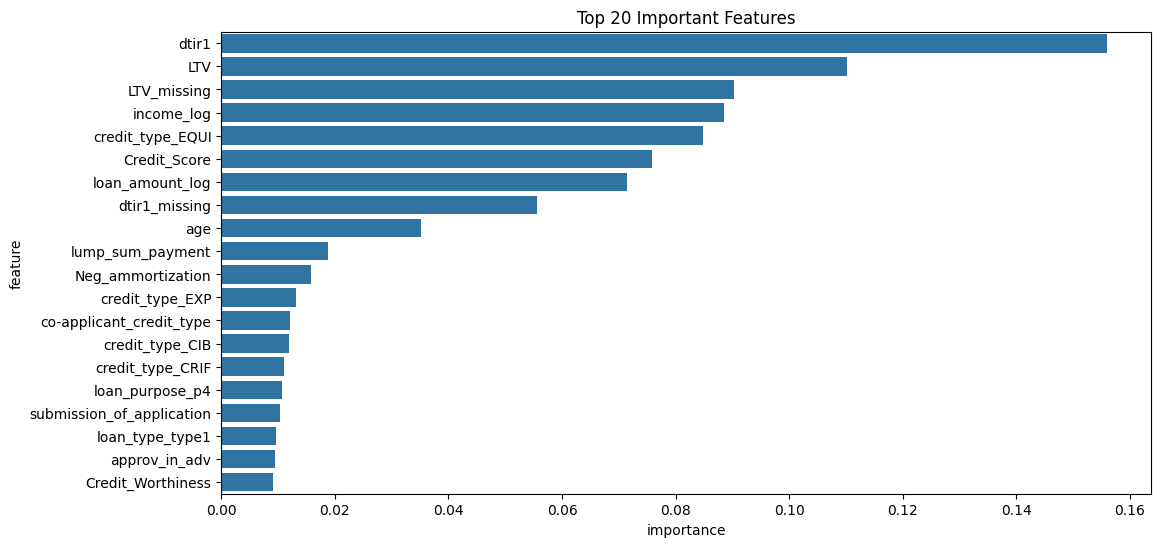

In [548]:
from sklearn.ensemble import RandomForestClassifier
importances_model = RandomForestClassifier(n_estimators=100, random_state=42)
importances_model.fit(X_train_ready, y_train)

importances = importances_model.feature_importances_

feature_names = get_feature_names(preprocessor)

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(20), x='importance', y='feature')
plt.title('Top 20 Important Features')
plt.show()


In [72]:
# df['dti_ratio'] = df['loan_amount_log'] / df['income_log']
df['loan_per_age'] = df['loan_amount_log'] / df['age'].map({
    '<25': 25, '25-34': 30, '35-44': 40, '45-54': 50, '55-64': 60, '65-74': 70, '>74': 75
})

df['high_LTV_flag'] = (df['LTV'] > 0.85).astype(int)

risk_cols = ['Neg_ammortization', 'interest_only', 'lump_sum_payment']
df['risk_score'] = df[risk_cols].apply(lambda x: x.astype('category').cat.codes).sum(axis=1)





X = df.drop(columns=['Status'])
y = df['Status']


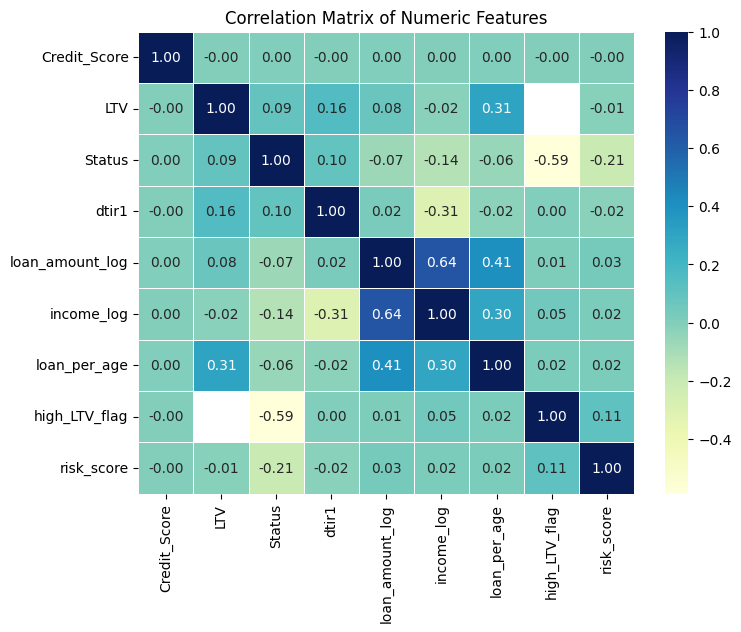

In [550]:
numeric_df = df.select_dtypes(include=np.number)
cols_to_exclude_corr = ['ID', 'year']
numeric_df_corr = numeric_df.drop(columns=cols_to_exclude_corr, errors='ignore')

correlation_matrix = numeric_df_corr.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
# 🔧 سمة جديدة:
# dti_ratio = loan_amount / income
# (أو استخدم loan_amount_log / income_log لو كنت تستخدم النسخ اللوغاريتمية).

# 📌 السبب:
# تعكس قدرة الشخص على تحمل الدين مقارنةً بدخله — مؤشر مهم جدًا في تقييم الجدارة الائتمانية.
# loan_per_age = loan_amount / age

# 📌 السبب:
# يُظهر عبء الدين حسب العمر، فالشباب الذين يحصلون على قروض ضخمة قد يُعتبرون أكثر مخاطرة.
# 5. مؤشر الشك المالي (Financial Uncertainty Index)
# 🔧 سمة مركبة (تجريبية):
# اجمع بين عدة مؤشرات مخاطرة:


#Modeling

##D

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# without new feature
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)


tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = tree_model.predict(X_val_ready)


precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Precision: 0.6735
Recall: 0.5624
F1 Score: 0.613

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     17926
           1       0.67      0.56      0.61      5862

    accuracy                           0.82     23788
   macro avg       0.77      0.74      0.75     23788
weighted avg       0.82      0.82      0.82     23788



In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = tree_model.predict(X_val_ready)

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Precision: 0.8865
Recall: 0.5167
F1 Score: 0.6529

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     17926
           1       0.89      0.52      0.65      5862

    accuracy                           0.86     23788
   macro avg       0.87      0.75      0.78     23788
weighted avg       0.87      0.86      0.85     23788



In [86]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_ready, y_train)

tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)


tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = tree_model.predict(X_val_ready)

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Precision: 0.9385
Recall: 0.4838
F1 Score: 0.6385

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     17926
           1       0.94      0.48      0.64      5862

    accuracy                           0.86     23788
   macro avg       0.90      0.74      0.78     23788
weighted avg       0.88      0.86      0.85     23788



In [88]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]


tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = tree_model.predict(X_val_ready)

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Precision: 0.9385
Recall: 0.4838
F1 Score: 0.6385

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     17926
           1       0.94      0.48      0.64      5862

    accuracy                           0.86     23788
   macro avg       0.90      0.74      0.78     23788
weighted avg       0.88      0.86      0.85     23788



In [89]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


feature_names_after_transform = get_feature_names(preprocessor)
X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)

def objective(trial):


    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]


        X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_tr, y_tr)


        model.fit(X_resampled, y_resampled)


        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


print("\nأفضل المعاملات:")
print(study.best_params)

print("\nأفضل F1 Score (بمتوسط cross-validation):")
print(round(study.best_value, 4))

[I 2025-07-14 10:30:48,431] A new study created in memory with name: no-name-19fe698a-a619-4f43-a3a7-75c696849f7a
[I 2025-07-14 10:30:53,932] Trial 0 finished with value: 0.5871851788027169 and parameters: {'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5871851788027169.
[I 2025-07-14 10:30:59,130] Trial 1 finished with value: 0.604220984060241 and parameters: {'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 2, 'criterion': 'entropy'}. Best is trial 1 with value: 0.604220984060241.
[I 2025-07-14 10:31:05,892] Trial 2 finished with value: 0.6751288700048603 and parameters: {'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 9, 'criterion': 'gini'}. Best is trial 2 with value: 0.6751288700048603.
[I 2025-07-14 10:31:15,286] Trial 3 finished with value: 0.6962258977829408 and parameters: {'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 3 with va


أفضل المعاملات:
{'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 10, 'criterion': 'entropy'}

أفضل F1 Score (بمتوسط cross-validation):
0.7079


In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


tree_model = DecisionTreeClassifier(
    max_depth=16,
    min_samples_split=6,
    min_samples_leaf=10,
    criterion= 'entropy',
    random_state=42
)

tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = tree_model.predict(X_val_ready)
y_scores = tree_model.predict_proba(X_val_ready)[:, 1]

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_scores)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("PR AUC Score:", round(pr_auc, 4))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Precision: 0.8556
Recall: 0.5943
F1 Score: 0.7014
PR AUC Score: 0.784

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     17926
           1       0.86      0.59      0.70      5862

    accuracy                           0.88     23788
   macro avg       0.87      0.78      0.81     23788
weighted avg       0.87      0.88      0.87     23788



In [92]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


tree_model = DecisionTreeClassifier(
    max_depth=13,
    min_samples_split=18,
    min_samples_leaf=3,
    criterion= 'entropy',
    random_state=42
)

tree_model.fit(X_train_resampled, y_train_resampled)

y_pred = tree_model.predict(X_val_ready)
y_scores = tree_model.predict_proba(X_val_ready)[:, 1]

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_scores)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("PR AUC Score:", round(pr_auc, 4))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Precision: 0.8787
Recall: 0.586
F1 Score: 0.7031
PR AUC Score: 0.7826

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     17926
           1       0.88      0.59      0.70      5862

    accuracy                           0.88     23788
   macro avg       0.88      0.78      0.81     23788
weighted avg       0.88      0.88      0.87     23788



##Gussian naine bais

In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_ready, y_train)

model = GaussianNB()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_val_ready)


precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))



Precision: 0.9561
Recall: 0.4458
F1 Score: 0.608


##XGB

In [94]:
def plot_confusion_matrix_and_pr_auc(y_true, y_pred, y_scores):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    pr_auc = average_precision_score(y_true, y_scores)
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"PR AUC Score: {pr_auc:.4f}")


In [95]:
def plot_learning_curves(results):
    logloss_train = results['validation_0']['logloss']
    logloss_val = results['validation_1']['logloss']

    error_train = results['validation_0'].get('error')
    error_val = results['validation_1'].get('error')

    epochs = range(1, len(logloss_train) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, logloss_train, label='Train Loss')
    plt.plot(epochs, logloss_val, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title('Log Loss Over Epochs')
    plt.legend()

    if error_train and error_val:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, error_train, label='Train Error')
        plt.plot(epochs, error_val, label='Validation Error')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Classification Error Over Epochs')
        plt.legend()

    plt.tight_layout()
    plt.show()


In [96]:
def print_metrics(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0     0.8854    0.9837    0.9320     17926
           1     0.9243    0.6107    0.7355      5862

    accuracy                         0.8918     23788
   macro avg     0.9049    0.7972    0.8337     23788
weighted avg     0.8950    0.8918    0.8835     23788

Precision: 0.9243
Recall: 0.6107
F1 Score: 0.7355


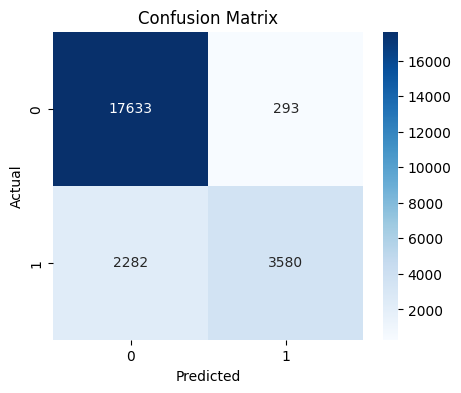

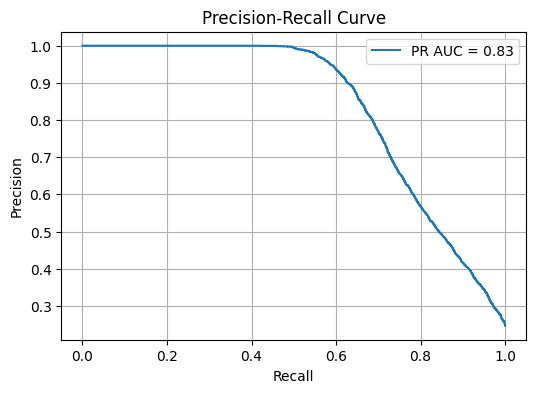

PR AUC Score: 0.8327


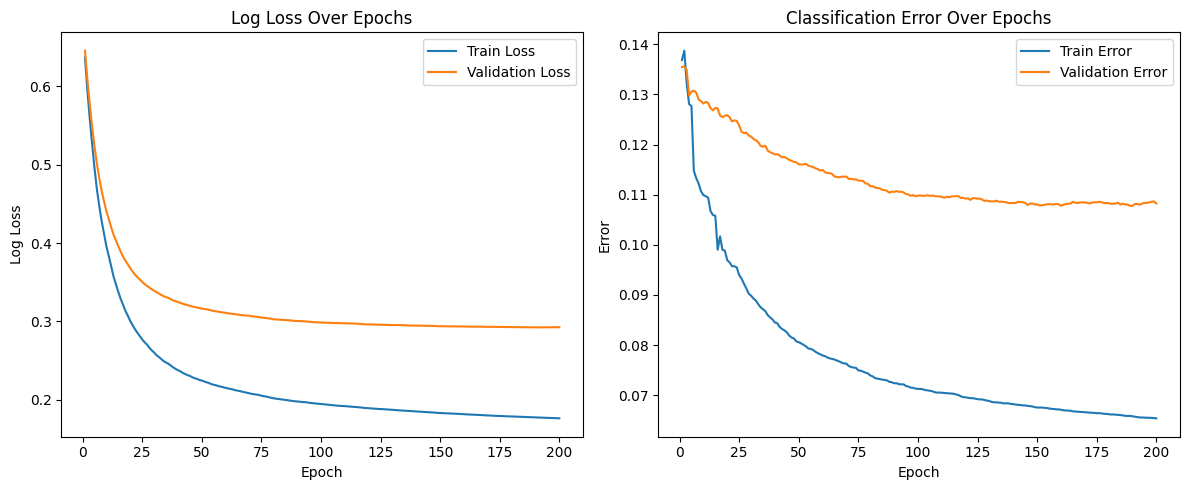

In [97]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    min_child_weight=1
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


Classification Report:
              precision    recall  f1-score   support

           0     0.8856    0.9831    0.9318     17926
           1     0.9221    0.6116    0.7354      5862

    accuracy                         0.8915     23788
   macro avg     0.9038    0.7973    0.8336     23788
weighted avg     0.8946    0.8915    0.8834     23788

Precision: 0.9221
Recall: 0.6116
F1 Score: 0.7354


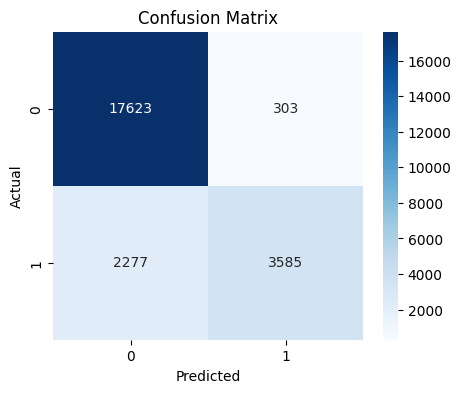

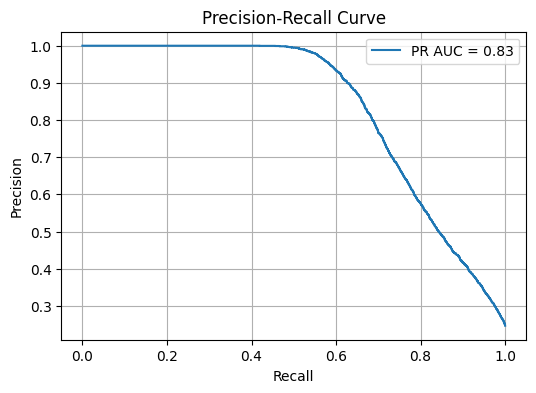

PR AUC Score: 0.8336


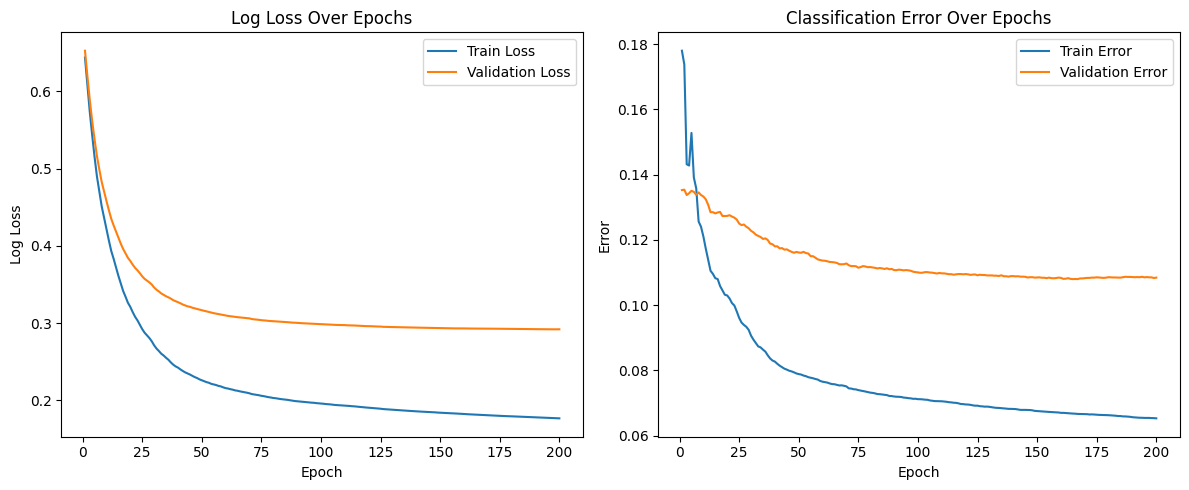

In [98]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    min_child_weight=1
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


Classification Report:
              precision    recall  f1-score   support

           0     0.9076    0.9100    0.9088     17926
           1     0.7225    0.7168    0.7196      5862

    accuracy                         0.8624     23788
   macro avg     0.8151    0.8134    0.8142     23788
weighted avg     0.8620    0.8624    0.8622     23788

Precision: 0.7225
Recall: 0.7168
F1 Score: 0.7196


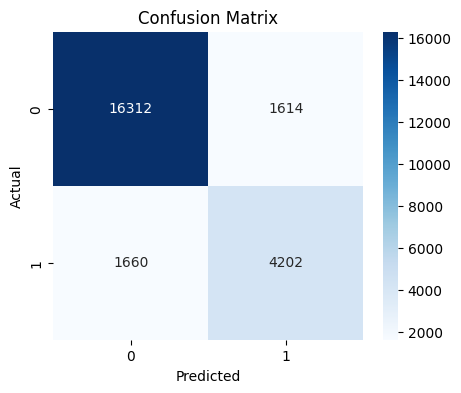

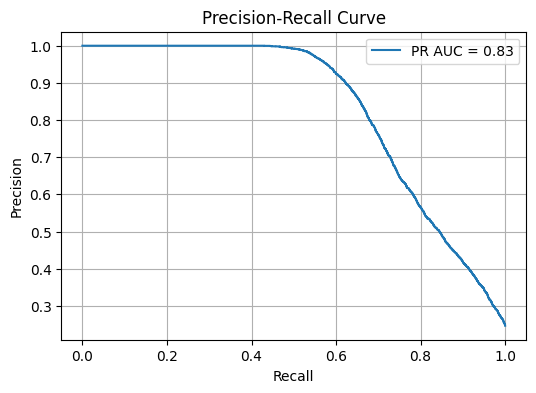

PR AUC Score: 0.8305


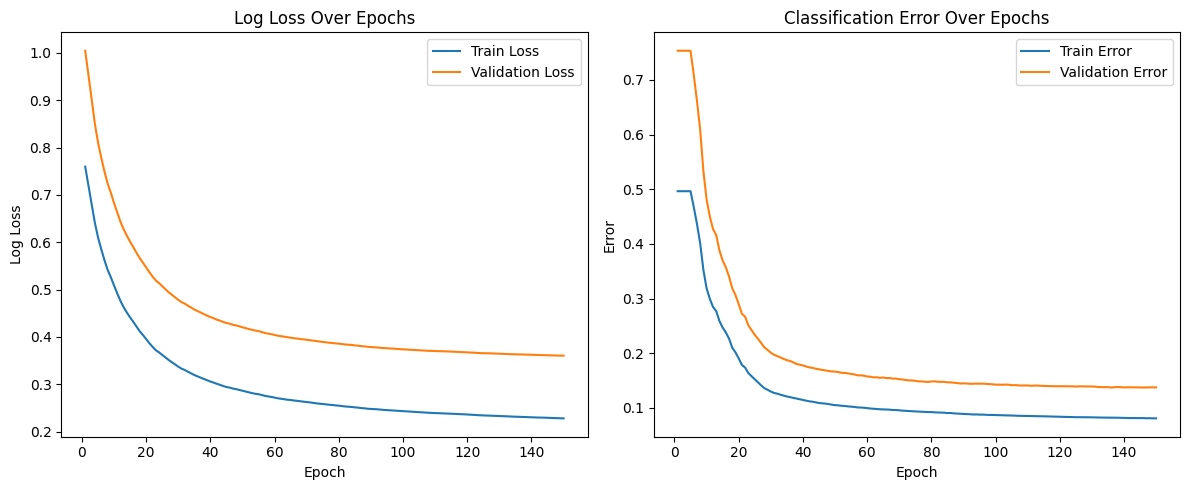

In [99]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]

model = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.6,
    reg_alpha=0.01,
    reg_lambda=1,
    min_child_weight=3,
    scale_pos_weight=pos_weight ,
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [100]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np


def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 2.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready_df, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        smote = SMOTE(random_state=42)
        X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

        model = XGBClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred)
        f1_scores.append(score)

    return np.mean(f1_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:")
print(study.best_params)
print(f"Best F1 Score: {study.best_value:.4f}")


[I 2025-07-14 10:44:22,534] A new study created in memory with name: no-name-7de0cf28-2ba0-45d1-8c7f-fb12d99a720a
[I 2025-07-14 10:44:36,735] Trial 0 finished with value: 0.727199154856716 and parameters: {'n_estimators': 159, 'max_depth': 6, 'learning_rate': 0.051476389633377376, 'subsample': 0.863980502228864, 'colsample_bytree': 0.9103230419566197, 'reg_alpha': 0.04017349195214484, 'reg_lambda': 0.7489606841259684, 'min_child_weight': 8}. Best is trial 0 with value: 0.727199154856716.
[I 2025-07-14 10:44:48,188] Trial 1 finished with value: 0.6579496481860019 and parameters: {'n_estimators': 141, 'max_depth': 4, 'learning_rate': 0.020993230283559934, 'subsample': 0.6151533460526661, 'colsample_bytree': 0.7497067553759381, 'reg_alpha': 0.015956247781862387, 'reg_lambda': 1.6475035620571297, 'min_child_weight': 4}. Best is trial 0 with value: 0.727199154856716.
[I 2025-07-14 10:45:09,523] Trial 2 finished with value: 0.7402138247471421 and parameters: {'n_estimators': 267, 'max_depth'

Best hyperparameters:
{'n_estimators': 211, 'max_depth': 7, 'learning_rate': 0.12262929643764565, 'subsample': 0.8180144480526698, 'colsample_bytree': 0.8937936802567938, 'reg_alpha': 0.03171149844199776, 'reg_lambda': 1.1884536879653202, 'min_child_weight': 6}
Best F1 Score: 0.7455


Classification Report:
              precision    recall  f1-score   support

           0     0.8859    0.9816    0.9313     17926
           1     0.9159    0.6133    0.7346      5862

    accuracy                         0.8908     23788
   macro avg     0.9009    0.7974    0.8330     23788
weighted avg     0.8933    0.8908    0.8828     23788

Precision: 0.9159
Recall: 0.6133
F1 Score: 0.7346


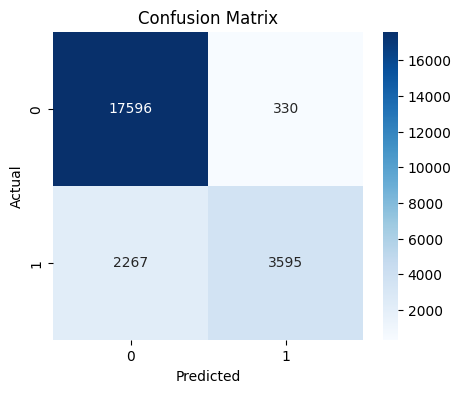

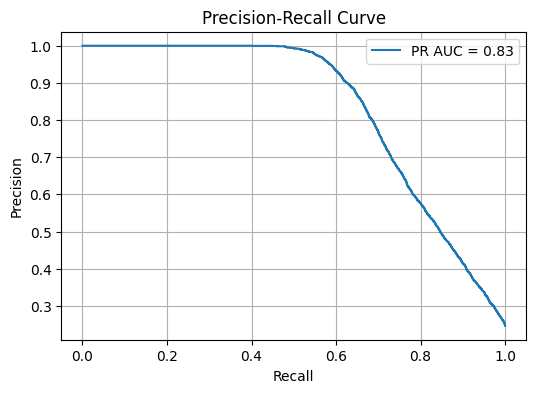

PR AUC Score: 0.8326


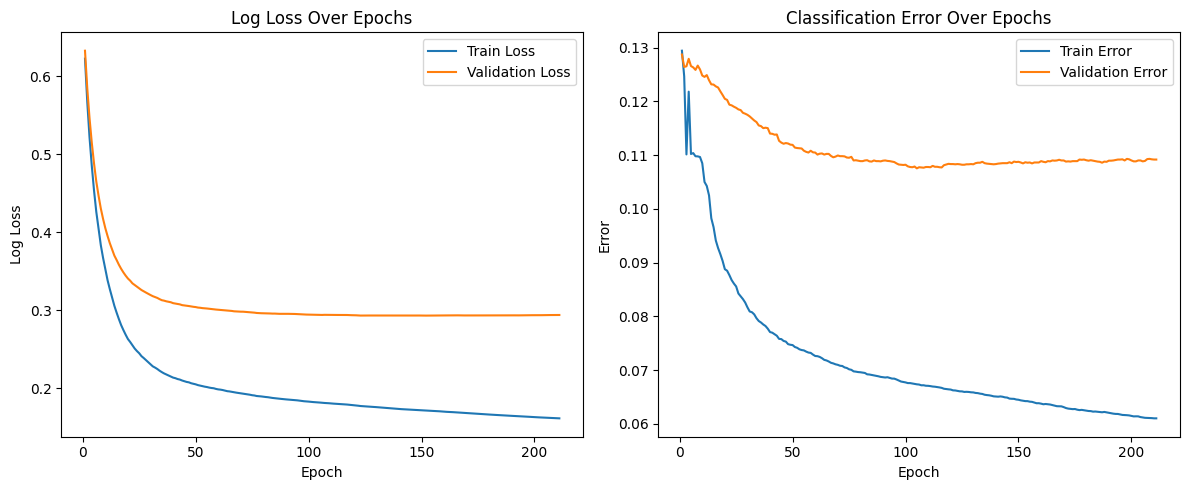

In [106]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=211,
    max_depth=7,
    learning_rate=0.12262929643764565,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8180144480526698,
    colsample_bytree=0.8937936802567938,
    reg_alpha=0.03171149844199776,
    reg_lambda=1.1884536879653202,
    min_child_weight=6
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [107]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np


def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 2.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready_df, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        smote = ADASYN(random_state=42)
        X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

        model = XGBClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred)
        f1_scores.append(score)

    return np.mean(f1_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:")
print(study.best_params)
print(f"Best F1 Score: {study.best_value:.4f}")


[I 2025-07-14 11:06:27,808] A new study created in memory with name: no-name-be489981-2019-4d14-84f7-e3f367868892
[I 2025-07-14 11:06:58,231] Trial 0 finished with value: 0.7207061158354675 and parameters: {'n_estimators': 288, 'max_depth': 4, 'learning_rate': 0.043266653092052285, 'subsample': 0.8562335245689536, 'colsample_bytree': 0.8037616658093198, 'reg_alpha': 0.08796241668345364, 'reg_lambda': 0.9868114457836269, 'min_child_weight': 8}. Best is trial 0 with value: 0.7207061158354675.
[I 2025-07-14 11:07:20,849] Trial 1 finished with value: 0.7409113957782731 and parameters: {'n_estimators': 104, 'max_depth': 6, 'learning_rate': 0.20190418667851368, 'subsample': 0.713721929271758, 'colsample_bytree': 0.5426705694541518, 'reg_alpha': 0.038368791903095716, 'reg_lambda': 1.9898957156240318, 'min_child_weight': 8}. Best is trial 1 with value: 0.7409113957782731.
[I 2025-07-14 11:07:50,049] Trial 2 finished with value: 0.7223685908330193 and parameters: {'n_estimators': 256, 'max_dept

Best hyperparameters:
{'n_estimators': 236, 'max_depth': 5, 'learning_rate': 0.15439408921411538, 'subsample': 0.8127487161328973, 'colsample_bytree': 0.5838085051852577, 'reg_alpha': 0.06678538268174433, 'reg_lambda': 0.7683866500989422, 'min_child_weight': 5}
Best F1 Score: 0.7441


Classification Report:
              precision    recall  f1-score   support

           0     0.8851    0.9817    0.9309     17926
           1     0.9160    0.6104    0.7326      5862

    accuracy                         0.8902     23788
   macro avg     0.9006    0.7960    0.8318     23788
weighted avg     0.8927    0.8902    0.8820     23788

Precision: 0.9160
Recall: 0.6104
F1 Score: 0.7326


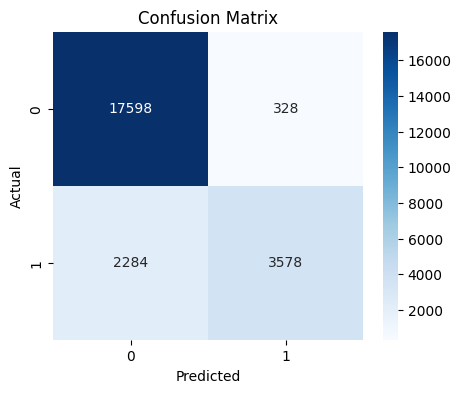

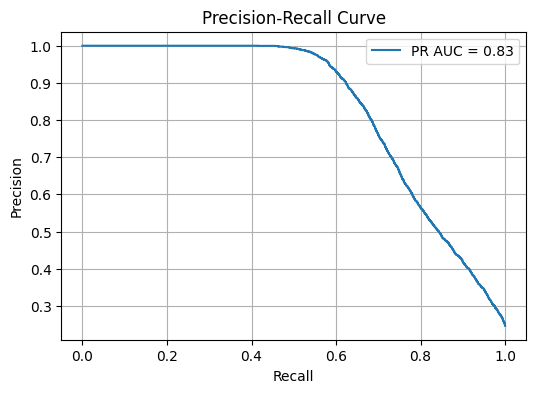

PR AUC Score: 0.8315


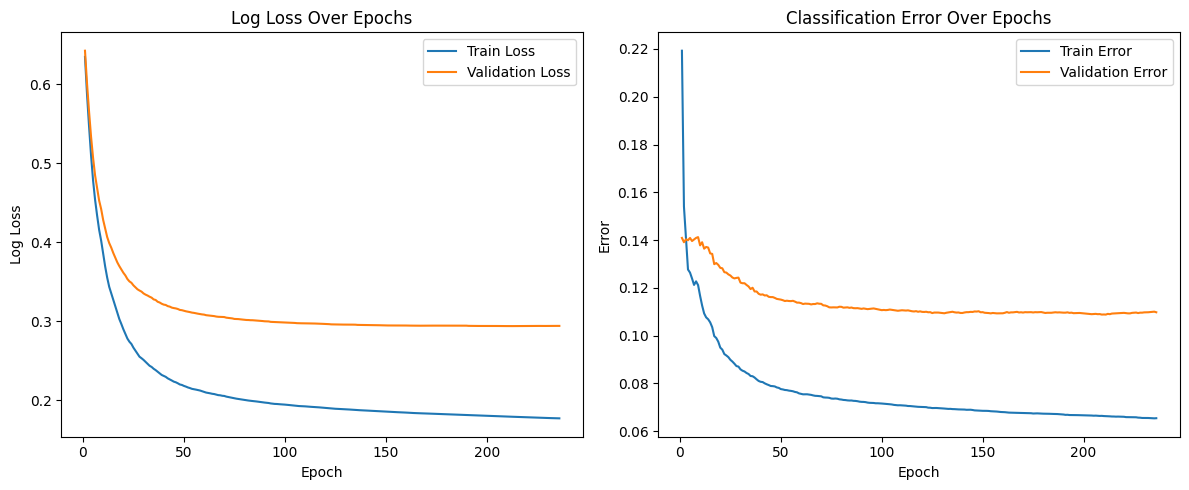

In [108]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=236,
    max_depth=5,
    learning_rate=0.15439408921411538,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8127487161328973,
    colsample_bytree=0.5838085051852577,
    reg_alpha=0.06678538268174433,
    reg_lambda=0.7683866500989422,
    min_child_weight=5
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import xgboost as xgb


feature_names_after_transform = get_feature_names(preprocessor)
X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'scale_pos_weight': pos_weight
    }

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("أفضل المعاملات:")
print(study.best_params)


أفضل المعاملات:
{'n_estimators': 276, 'max_depth': 10, 'learning_rate': 0.03522370842860682, 'subsample': 0.8294311972938809, 'colsample_bytree': 0.5991475016220844, 'reg_alpha': 0.4863521561020574, 'reg_lambda': 0.5259893626639738, 'min_child_weight': 1}


Classification Report:
              precision    recall  f1-score   support

           0     0.9053    0.9249    0.9150     17926
           1     0.7539    0.7040    0.7281      5862

    accuracy                         0.8704     23788
   macro avg     0.8296    0.8144    0.8215     23788
weighted avg     0.8680    0.8704    0.8689     23788

Precision: 0.7539
Recall: 0.7040
F1 Score: 0.7281


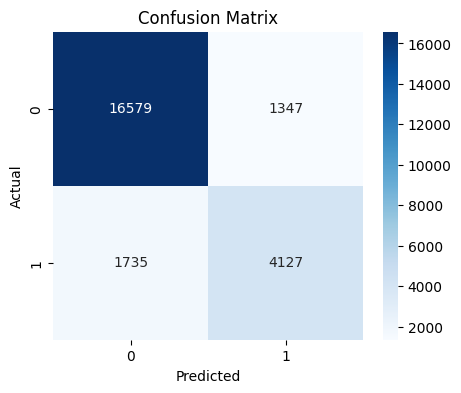

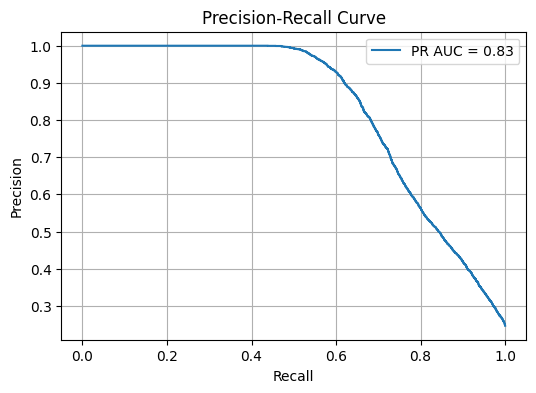

PR AUC Score: 0.8301


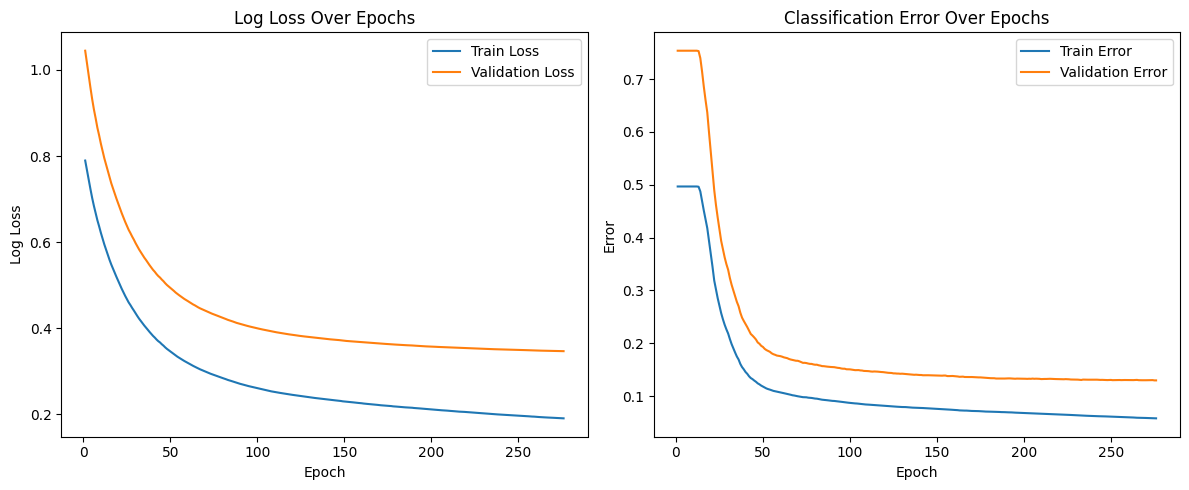

Training error: 0.05773492907801418
Validation error: 0.1295611232554229
Training logloss: 0.190981169260216
Validation logloss: 0.3469837059976589


In [109]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]

model = xgb.XGBClassifier(
    n_estimators=276,
    max_depth=10,
    learning_rate=0.03522370842860682,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8294311972938809,
    colsample_bytree=0.5991475016220844,
    reg_alpha=0.4863521561020574,
    reg_lambda=0.5259893626639738,
    min_child_weight=1,
    scale_pos_weight=pos_weight ,
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)
print("Training error:", results['validation_0']['error'][-1])
print("Validation error:", results['validation_1']['error'][-1])
print("Training logloss:", results['validation_0']['logloss'][-1])
print("Validation logloss:", results['validation_1']['logloss'][-1])

In [115]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier

feature_names_after_transform = get_feature_names(preprocessor)
X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 2.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        "jop_type":'TPU'
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready_df, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]


        smt = SMOTETomek(random_state=42)
        X_tr_res, y_tr_res = smt.fit_resample(X_tr, y_tr)

        model = XGBClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred)
        f1_scores.append(score)

    return np.mean(f1_scores)

# بدء البحث
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:")
print(study.best_params)
print(f"Best F1 Score: {study.best_value:.4f}")


[I 2025-07-14 11:41:17,523] A new study created in memory with name: no-name-ac76f7dd-2c9b-4b7b-9d1c-d413d77f07b0
[I 2025-07-14 11:43:14,686] Trial 0 finished with value: 0.6560635437983264 and parameters: {'n_estimators': 254, 'max_depth': 3, 'learning_rate': 0.022999667700504017, 'subsample': 0.7280874982543778, 'colsample_bytree': 0.7719115726441903, 'reg_alpha': 0.07353082534069846, 'reg_lambda': 1.534926220534631, 'min_child_weight': 8}. Best is trial 0 with value: 0.6560635437983264.
[I 2025-07-14 11:45:27,673] Trial 1 finished with value: 0.735353106596261 and parameters: {'n_estimators': 279, 'max_depth': 7, 'learning_rate': 0.21727405396010924, 'subsample': 0.5388965830007574, 'colsample_bytree': 0.9754847125147872, 'reg_alpha': 0.01846415521720456, 'reg_lambda': 1.623397035453537, 'min_child_weight': 9}. Best is trial 1 with value: 0.735353106596261.
[I 2025-07-14 11:47:57,188] Trial 2 finished with value: 0.7369918392023866 and parameters: {'n_estimators': 284, 'max_depth': 

Best hyperparameters:
{'n_estimators': 154, 'max_depth': 6, 'learning_rate': 0.1994414476549293, 'subsample': 0.9435299600228262, 'colsample_bytree': 0.9312170784286251, 'reg_alpha': 0.03789563346601285, 'reg_lambda': 0.6938730133360769, 'min_child_weight': 9}
Best F1 Score: 0.7444


Classification Report:
              precision    recall  f1-score   support

           0     0.8856    0.9820    0.9313     17926
           1     0.9174    0.6119    0.7341      5862

    accuracy                         0.8908     23788
   macro avg     0.9015    0.7969    0.8327     23788
weighted avg     0.8934    0.8908    0.8827     23788

Precision: 0.9174
Recall: 0.6119
F1 Score: 0.7341


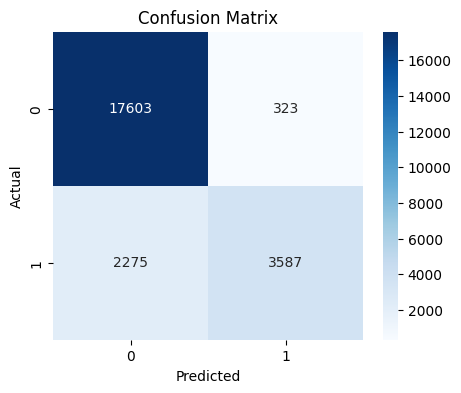

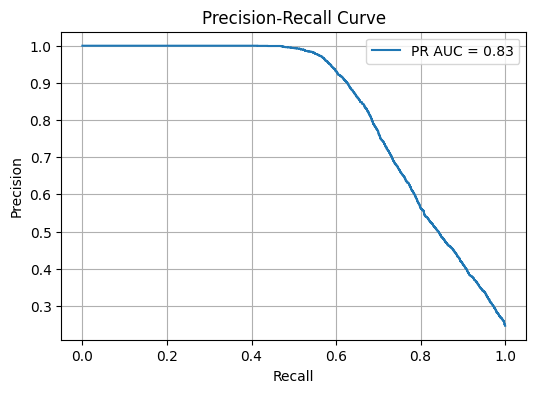

PR AUC Score: 0.8319


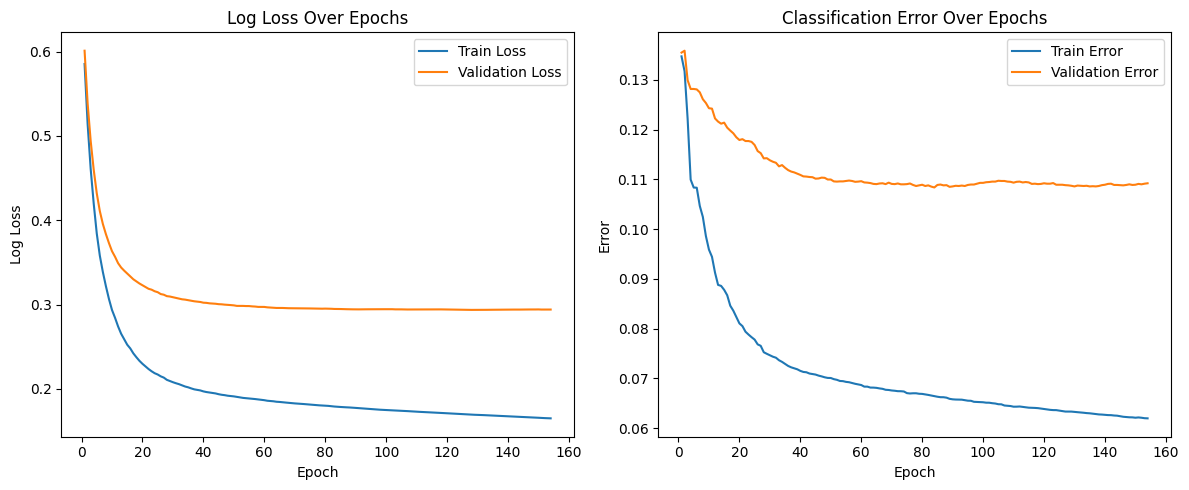

In [116]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=154,
    max_depth=6,
    learning_rate=0.1994414476549293,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9435299600228262,
    colsample_bytree=0.9312170784286251,
    reg_alpha=0.03789563346601285,
    reg_lambda=0.6938730133360769,
    min_child_weight=9
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [101]:
# print("Training error:", results['validation_0']['error'][-1])
# print("Validation error:", results['validation_1']['error'][-1])
# print("Training logloss:", results['validation_0']['logloss'][-1])
# print("Validation logloss:", results['validation_1']['logloss'][-1])

##Catboost

Classification Report:
              precision    recall  f1-score   support

           0     0.8839    0.9861    0.9322     17926
           1     0.9340    0.6039    0.7335      5862

    accuracy                         0.8919     23788
   macro avg     0.9090    0.7950    0.8329     23788
weighted avg     0.8962    0.8919    0.8832     23788

Precision: 0.9340
Recall: 0.6039
F1 Score: 0.7335


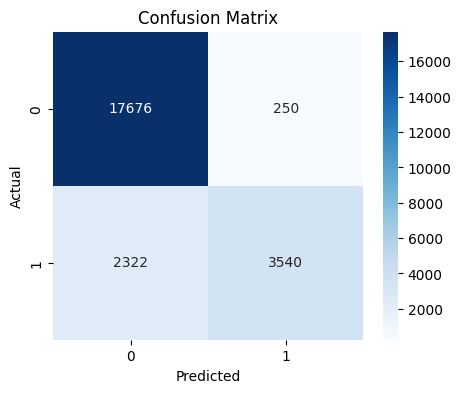

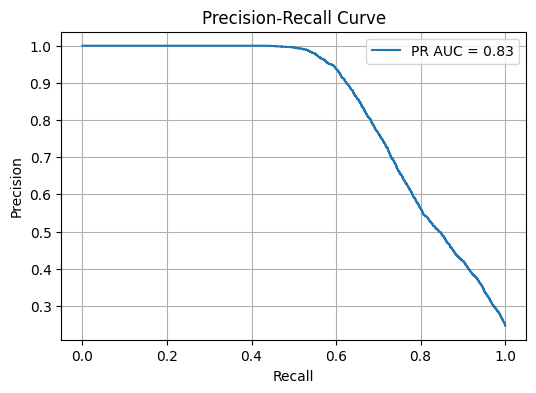

PR AUC Score: 0.8320


In [112]:
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    l2_leaf_reg=1,
    eval_metric='F1',
    verbose=False,
    task_type='CPU'
)

eval_pool = Pool(X_val_ready, y_val)

model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=eval_pool,
    use_best_model=True
)

y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:, 1]

print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score


feature_names_after_transform = get_feature_names(preprocessor)


X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)


def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        'random_seed': 42,
        'eval_metric': 'F1',
        'verbose': False,
        'task_type': 'CPU'
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        smote = SMOTE(random_state=42)
        X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

        model = CatBoostClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("أفضل معاملات:")
print(study.best_params)



[I 2025-07-12 00:52:21,978] A new study created in memory with name: no-name-5eb89494-4a4e-4b10-8c67-327715bbf8ef
[I 2025-07-12 00:53:09,366] Trial 0 finished with value: 0.7427671580947887 and parameters: {'iterations': 232, 'depth': 7, 'learning_rate': 0.29662148320763915, 'l2_leaf_reg': 0.5385655526829649}. Best is trial 0 with value: 0.7427671580947887.
[I 2025-07-12 00:53:38,515] Trial 1 finished with value: 0.7070082948990964 and parameters: {'iterations': 107, 'depth': 8, 'learning_rate': 0.01858979549170888, 'l2_leaf_reg': 0.22485498264196288}. Best is trial 0 with value: 0.7427671580947887.
[I 2025-07-12 00:54:25,305] Trial 2 finished with value: 0.7391249841560494 and parameters: {'iterations': 188, 'depth': 8, 'learning_rate': 0.19334429519185262, 'l2_leaf_reg': 0.12142949696169988}. Best is trial 0 with value: 0.7427671580947887.
[I 2025-07-12 00:54:42,513] Trial 3 finished with value: 0.6758984808684027 and parameters: {'iterations': 106, 'depth': 5, 'learning_rate': 0.020

أفضل معاملات:
{'iterations': 276, 'depth': 7, 'learning_rate': 0.12317377165241164, 'l2_leaf_reg': 2.312505969430195}


Classification Report:
              precision    recall  f1-score   support

           0     0.8868    0.9840    0.9329     17926
           1     0.9264    0.6160    0.7400      5862

    accuracy                         0.8933     23788
   macro avg     0.9066    0.8000    0.8364     23788
weighted avg     0.8966    0.8933    0.8853     23788

Precision: 0.9264
Recall: 0.6160
F1 Score: 0.7400


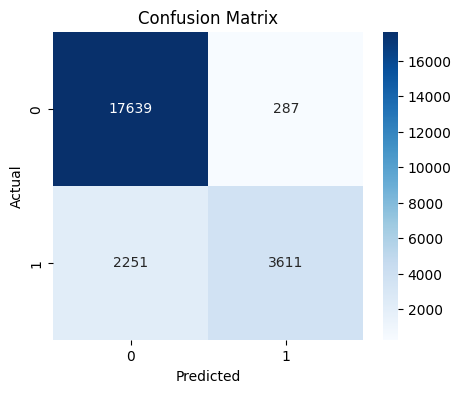

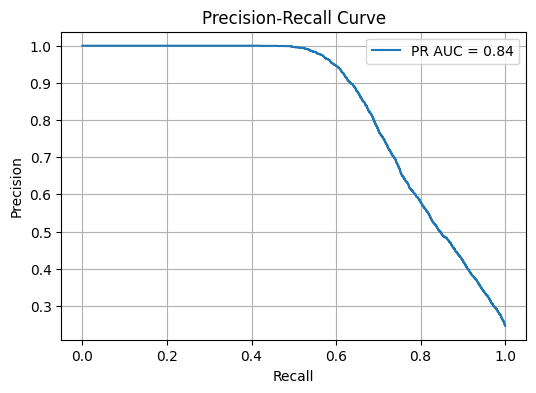

PR AUC Score: 0.8356


In [ ]:
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
    task_type='CPU'
)

eval_pool = Pool(X_val_ready, y_val)

model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=eval_pool,
    use_best_model=True
)

y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:, 1]

print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)


##LightGBM

[LightGBM] [Info] Number of positive: 71699, number of negative: 71699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11406
[LightGBM] [Info] Number of data points in the train set: 143398, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Baseline LightGBM Metrics:
Accuracy:  0.8920
Precision: 0.9256
Recall:    0.6109
F1 Score:  0.7360
ROC AUC:   0.8904


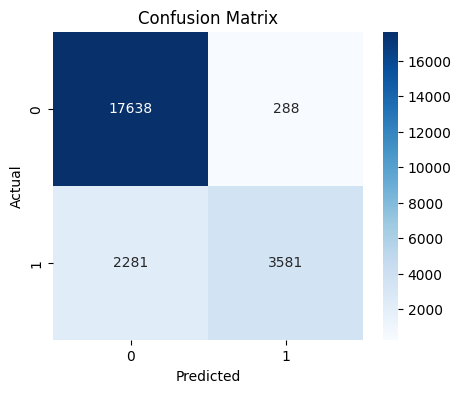

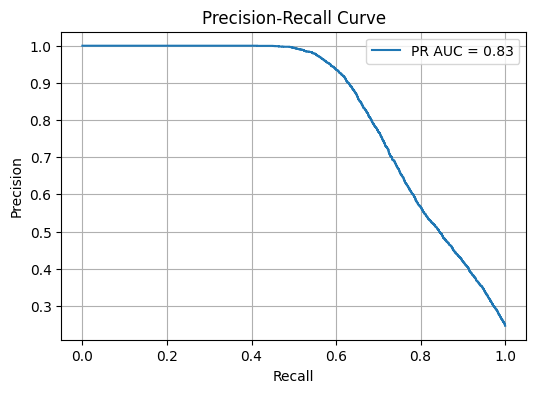

PR AUC Score: 0.8325


In [113]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=200,
    learning_rate=0.1
)

# التدريب
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_val_ready)
y_scores = model.predict_proba(X_val_ready)[:, 1]

# التقييم
print("Baseline LightGBM Metrics:")
print(f"Accuracy:  {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall:    {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_val, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val, y_scores):.4f}")

plot_confusion_matrix_and_pr_auc(y_val, y_pred, y_scores)


In [ ]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

feature_names_after_transform = get_feature_names(preprocessor)
X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)


# كائن StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# دالة الهدف لـ Optuna
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        "verbosity": -1,
        "random_state": 42,
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 15, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
    }

    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready, y_train):
        # التقسيم
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]


        # تطبيق SMOTE على بيانات التدريب
        smote = SMOTE(random_state=42)
        X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

        # تدريب النموذج
        model = lgb.LGBMClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        # التنبؤ
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)

# بدء ضبط المعاملات
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# عرض أفضل النتائج
print("أفضل معاملات:")
print(study.best_params)
print("أفضل F1:", study.best_value)


[I 2025-07-12 02:18:52,420] A new study created in memory with name: no-name-46c03ee4-b625-406f-ac19-f22d34556fc5
[I 2025-07-12 02:19:32,701] Trial 0 finished with value: 0.7461925424747772 and parameters: {'n_estimators': 176, 'learning_rate': 0.15435692641723955, 'num_leaves': 93, 'max_depth': 6, 'min_child_samples': 48, 'subsample': 0.6208860330833614, 'colsample_bytree': 0.903984494579587, 'reg_alpha': 0.9578534332774293, 'reg_lambda': 0.8752268603919657}. Best is trial 0 with value: 0.7461925424747772.
[I 2025-07-12 02:20:06,747] Trial 1 finished with value: 0.7453302234613511 and parameters: {'n_estimators': 206, 'learning_rate': 0.14265166974559698, 'num_leaves': 19, 'max_depth': 5, 'min_child_samples': 38, 'subsample': 0.9664517004100884, 'colsample_bytree': 0.6984240719023975, 'reg_alpha': 0.11722788099539672, 'reg_lambda': 0.7713889737839702}. Best is trial 0 with value: 0.7461925424747772.
[I 2025-07-12 02:20:35,246] Trial 2 finished with value: 0.7462609775420518 and parame

أفضل معاملات:
{'n_estimators': 281, 'learning_rate': 0.09935895550011196, 'num_leaves': 76, 'max_depth': 7, 'min_child_samples': 43, 'subsample': 0.7765247938658351, 'colsample_bytree': 0.7066007557138821, 'reg_alpha': 0.32076822314090064, 'reg_lambda': 0.6695294896407586}
أفضل F1: 0.7473118629440852


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Baseline LightGBM Metrics:
Accuracy:  0.8934
Precision: 0.9195
Recall:    0.6220
F1 Score:  0.7420
ROC AUC:   0.8921


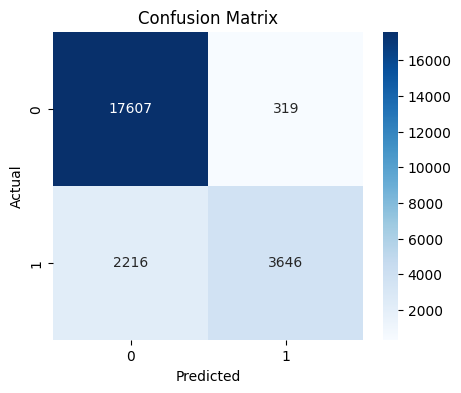

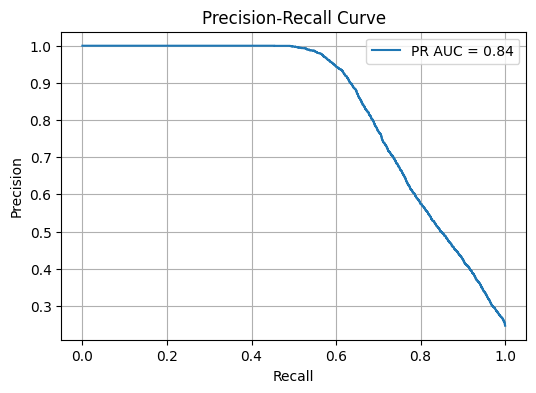

PR AUC Score: 0.8355


In [ ]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

# التدريب
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_val_ready)
y_scores = model.predict_proba(X_val_ready)[:, 1]

# التقييم
print("Baseline LightGBM Metrics:")
print(f"Accuracy:  {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall:    {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_val, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val, y_scores):.4f}")

plot_confusion_matrix_and_pr_auc(y_val, y_pred, y_scores)


##AdaBoost


##Stacking

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=1000),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 Precision  : 0.9099
 Recall     : 0.6286
 F1 Score   : 0.7435


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=10000),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 Precision  : 0.9133
 Recall     : 0.6293
 F1 Score   : 0.7452


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=10000),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 Precision  : 0.9120
 Recall     : 0.6279
 F1 Score   : 0.7438


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)
tree_model = DecisionTreeClassifier(
    max_depth=13,
    min_samples_split=18,
    min_samples_leaf=3,
    criterion= 'entropy',
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model),
        ('tree', tree_model)

    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=10000),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")


 Precision  : 0.9132
 Recall     : 0.6298
 F1 Score   : 0.7455


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)
tree_model = DecisionTreeClassifier(
    max_depth=13,
    min_samples_split=18,
    min_samples_leaf=3,
    criterion= 'entropy',
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model),
        ('tree', tree_model)

    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=10000),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 Precision  : 0.9118
 Recall     : 0.6262
 F1 Score   : 0.7425


 Precision  : 0.9132
 Recall     : 0.6298
 F1 Score   : 0.7455

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)
tree_model = DecisionTreeClassifier(
    max_depth=13,
    min_samples_split=18,
    min_samples_leaf=3,
    criterion= 'entropy',
    random_state=42
)

stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model),
        ('tree', tree_model)

    ],
    final_estimator=LogisticRegression(C=1.0, max_iter=20000),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")


 Precision  : 0.9132
 Recall     : 0.6298
 F1 Score   : 0.7455


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)
final_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=final_model,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 Precision  : 0.9263
 Recall     : 0.6194
 F1 Score   : 0.7424


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)
final_model = GradientBoostingClassifier(n_estimators=280, learning_rate=0.05)
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=final_model,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stacking_model.fit(X_train_ready, y_train)

y_pred = stacking_model.predict(X_val_ready)

f1 = f1_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f" Precision  : {precision:.4f}")
print(f" Recall     : {recall:.4f}")
print(f" F1 Score   : {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


 Precision  : 0.9245
 Recall     : 0.6186
 F1 Score   : 0.7412


In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)


xgb_model = XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

cat_model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
)
tree_model = DecisionTreeClassifier(
    max_depth=13,
    min_samples_split=18,
    min_samples_leaf=3,
    criterion= 'entropy',
    random_state=42
)

def objective(trial):
    C = trial.suggest_float('C', 0.01, 10.0, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

    final_estimator = LogisticRegression(C=C, penalty=penalty, solver=solver,
                                         max_iter=10000, random_state=42)

    # خيارات stacking
    passthrough = trial.suggest_categorical('passthrough', [True, False])
    cv_folds = trial.suggest_int('cv', 3, 7)

    stacking_model = StackingClassifier(
        estimators=[
            ('xgb', xgb_model),
            ('lgb', lgb_model),
            ('cat', cat_model),
            ('tree', tree_model)
        ],
        final_estimator=final_estimator,
        cv=cv_folds,
        passthrough=passthrough,
        n_jobs=-1
    )

    score = cross_val_score(stacking_model, X_train_ready, y_train, cv=cv_folds,
                            scoring='f1', n_jobs=-1).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("أفضل F1:", study.best_value)
print("أفضل الإعدادات:")
print(study.best_params)


##NN

In [60]:
def plot_learning_curves_keras(history):
    """رسم منحنيات الخسارة والدقة من كائن التاريخ history الخاص بـ Keras"""
    plt.figure(figsize=(12,5))

    # رسم الخسارة
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # رسم الدقة (accuracy) إذا كانت موجودة
    if 'accuracy' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy Over Epochs')
        plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4482/4482 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7730 - loss: 0.4486 - val_accuracy: 0.8593 - val_loss: 0.3439
Epoch 2/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8066 - loss: 0.3990 - val_accuracy: 0.8165 - val_loss: 0.4259
Epoch 3/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8181 - loss: 0.3822 - val_accuracy: 0.8376 - val_loss: 0.3813
Epoch 4/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8253 - loss: 0.3685 - val_accuracy: 0.8555 - val_loss: 0.3382
Epoch 5/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8334 - loss: 0.3578 - val_accuracy: 0.8363 - val_loss: 0.3685
Epoch 6/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8380 - loss: 0.3507 - val_accuracy: 0.8735 - val_loss: 0.3256
Epoch 7/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8426 - loss: 0.3406 - val_accuracy: 0.8741 - val_loss: 0.3278
Epoch 8/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8485 - loss: 0.333

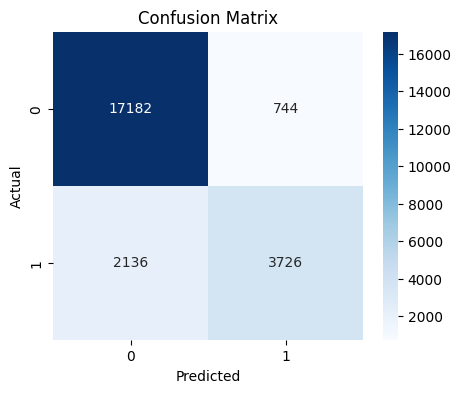

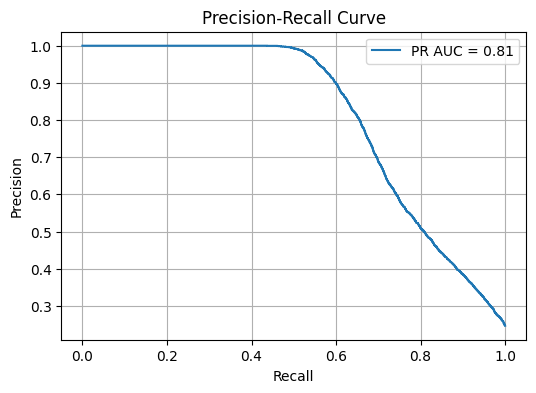

PR AUC Score: 0.8112
Classification Report:
              precision    recall  f1-score   support

           0     0.8894    0.9585    0.9227     17926
           1     0.8336    0.6356    0.7213      5862

    accuracy                         0.8789     23788
   macro avg     0.8615    0.7971    0.8220     23788
weighted avg     0.8757    0.8789    0.8730     23788

Precision: 0.8336
Recall: 0.6356
F1 Score: 0.7213


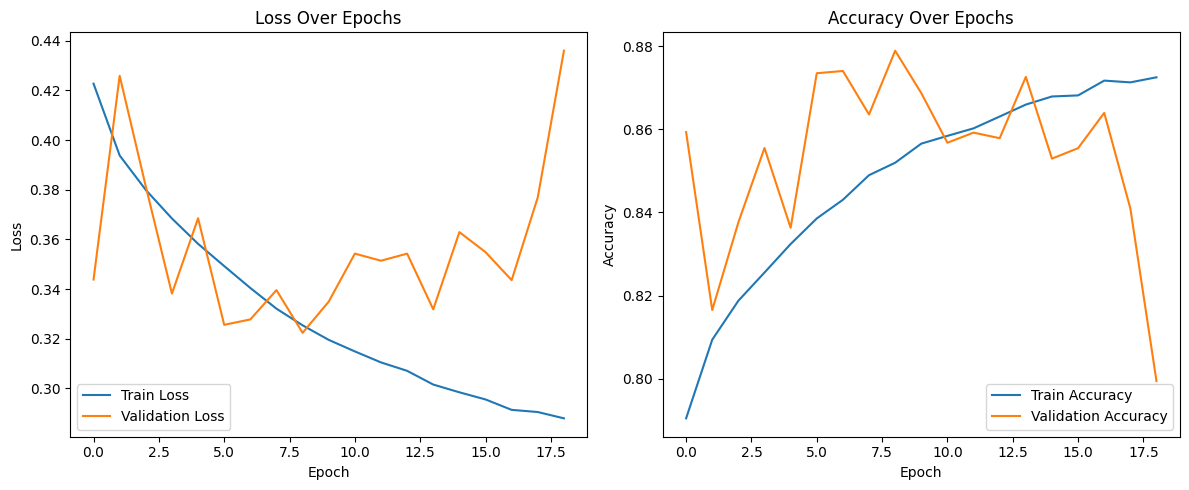

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

# 2. بناء نموذج الشبكة العصبية
input_dim = X_train_resampled.shape[1]

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    # Dropout(0.3),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # لأن التصنيف ثنائي
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. تدريب النموذج مع Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val_ready, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# 4. التقييم

# التنبؤ بالاحتمالات على بيانات التحقق
y_val_scores = model.predict(X_val_ready).flatten()

# التنبؤ بالتصنيفات
y_val_pred = (y_val_scores >= 0.5).astype(int)

# استخدام الدوال اللي كتبتها
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
print_metrics(y_val, y_val_pred)
# بعد تدريب النموذج والحصول على history
plot_learning_curves_keras(history)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4482/4482 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7214 - loss: 0.5182 - val_accuracy: 0.8396 - val_loss: 0.3921 - learning_rate: 1.0000e-04
Epoch 2/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7866 - loss: 0.4299 - val_accuracy: 0.8327 - val_loss: 0.3990 - learning_rate: 1.0000e-04
Epoch 3/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7922 - loss: 0.4211 - val_accuracy: 0.8194 - val_loss: 0.4166 - learning_rate: 1.0000e-04
Epoch 4/100
4481/4482 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.4142
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7970 - loss: 0.4142 - val_accuracy: 0.8313 - val_loss: 0.4005 - learning_rate: 1.0000e-04
Epoch 5/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8023 - loss: 0.4068 - val_accuracy: 0.8389 - val_loss: 0.3860 - learning_rate: 5.0000e-05
Epoch 6/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - a

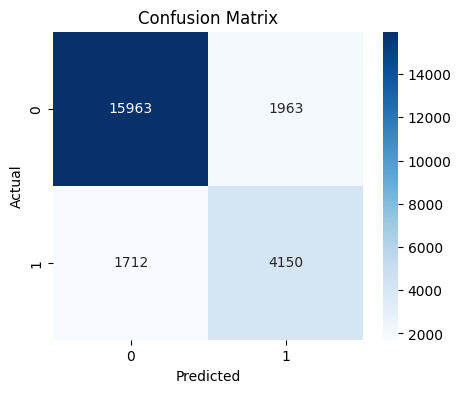

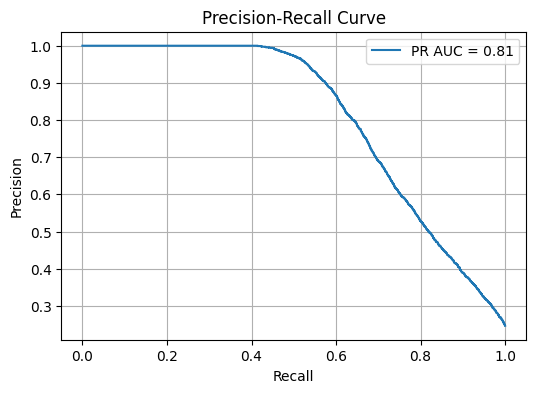

PR AUC Score: 0.8087
Classification Report:
              precision    recall  f1-score   support

           0     0.9031    0.8905    0.8968     17926
           1     0.6789    0.7079    0.6931      5862

    accuracy                         0.8455     23788
   macro avg     0.7910    0.7992    0.7949     23788
weighted avg     0.8479    0.8455    0.8466     23788

Precision: 0.6789
Recall: 0.7079
F1 Score: 0.6931


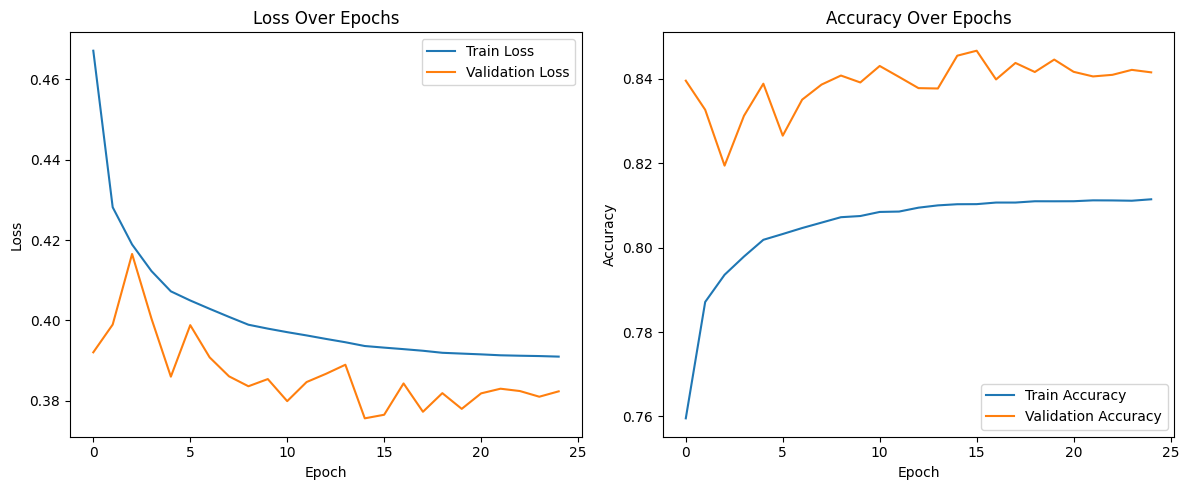

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

# 2. بناء نموذج الشبكة العصبية
input_dim = X_train_resampled.shape[1]

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    # Dropout(0.3),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # لأن التصنيف ثنائي
])
optimizer = Adam(learning_rate=0.0001)  # قللها من 0.001 إلى 0.0001 مثلاً

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. تدريب النموذج مع Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
)

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val_ready, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 4. التقييم

# التنبؤ بالاحتمالات على بيانات التحقق
y_val_scores = model.predict(X_val_ready).flatten()

# التنبؤ بالتصنيفات
y_val_pred = (y_val_scores >= 0.5).astype(int)

# استخدام الدوال اللي كتبتها
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
print_metrics(y_val, y_val_pred)
# بعد تدريب النموذج والحصول على history
plot_learning_curves_keras(history)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.7206 - loss: 0.5016 - val_accuracy: 0.8087 - val_loss: 0.4348 - learning_rate: 1.0000e-04
Epoch 2/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.7889 - loss: 0.4267 - val_accuracy: 0.8341 - val_loss: 0.3942 - learning_rate: 1.0000e-04
Epoch 3/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.7958 - loss: 0.4172 - val_accuracy: 0.8318 - val_loss: 0.3988 - learning_rate: 1.0000e-04
Epoch 4/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8003 - loss: 0.4096 - val_accuracy: 0.8322 - val_loss: 0.3985 - learning_rate: 1.0000e-04
Epoch 5/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8035 - loss: 0.4068 - val_accuracy: 0.8392 - val_loss: 0.3855 - learning_rate: 1.0000e-04
Epoch 6/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.8065 - loss: 0.4009 - val_accuracy: 0.8516 - val_loss: 0.3673 - learning_rate: 1.0000e-04
Epoch 7/100
4482/4482 ━━━━━━━━━━━━━━━━━━

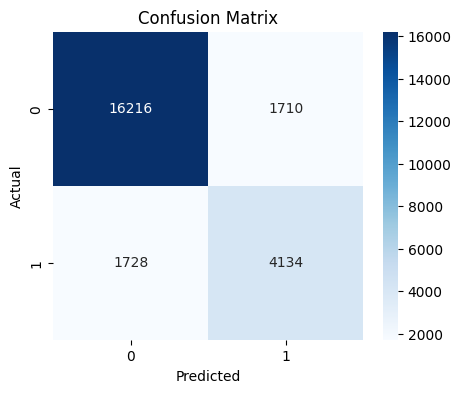

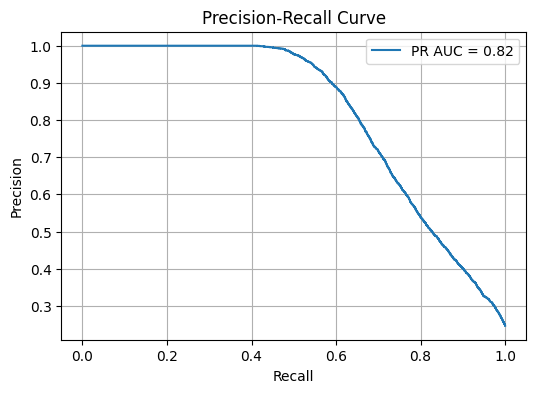

PR AUC Score: 0.8164
Classification Report:
              precision    recall  f1-score   support

           0     0.9037    0.9046    0.9042     17926
           1     0.7074    0.7052    0.7063      5862

    accuracy                         0.8555     23788
   macro avg     0.8055    0.8049    0.8052     23788
weighted avg     0.8553    0.8555    0.8554     23788

Precision: 0.7074
Recall: 0.7052
F1 Score: 0.7063


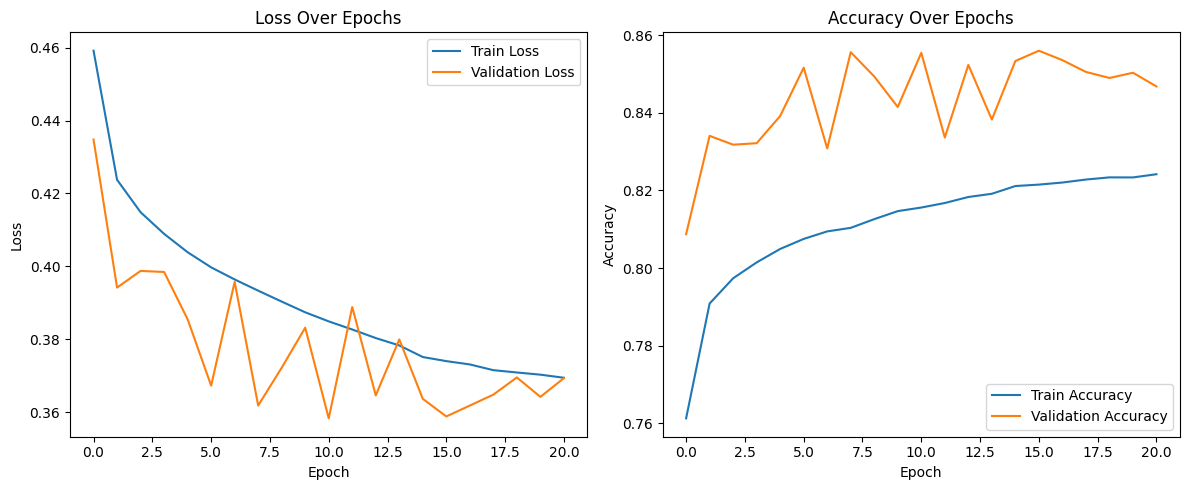

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

input_dim = X_train_resampled.shape[1]

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    # Dropout(0.1),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
)

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val_ready, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


y_val_scores = model.predict(X_val_ready).flatten()

y_val_pred = (y_val_scores >= 0.5).astype(int)

plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
print_metrics(y_val, y_val_pred)
plot_learning_curves_keras(history)


#f
<div dir="rtl">
بالطبع، إليك شرحًا لكل متغير (عمود) في هذا الجدول من قاعدة البيانات، بناءً على أسمائه والمجال المحتمل (قروض أو تمويل عقاري). إذا كنت تعمل على تحليل أو نمذجة بيانات، فهذا سيساعدك على فهم المتغيرات بشكل أفضل:

* * *

### 💡 **المتغيرات الأساسية**

| العمود                       | الشرح                                                                           |
| ---------------------------- | ------------------------------------------------------------------------------- |
| **ID**                       | رقم تعريفي فريد لكل صف أو طلب.                                                  |
| **year**                     | سنة تقديم طلب القرض.                                                            |
| **loan\_limit**              | الحد الأعلى للقرض (قد يشير إلى نوع الحد، مثل "Conforming" أو "Non-conforming"). |
| **Gender**                   | جنس المتقدم (ذكر / أنثى / غير محدد).                                            |
| **approv\_in\_adv**          | هل تمت الموافقة على القرض بشكل مسبق؟                                            |
| **loan\_type**               | نوع القرض (على سبيل المثال: قرض عقاري، قرض شخصي...).                            |
| **loan\_purpose**            | الغرض من القرض (شراء منزل، تجديد، تعليم...).                                    |
| **Credit\_Worthiness**       | الجدارة الائتمانية للمقترض (جيد، ضعيف، إلخ).                                    |
| **open\_credit**              | ما إذا كان لدى العميل أرصدة ائتمانية مفتوحة.                                    |
| **business\_or\_commercial** | هل الغرض من القرض تجاري أو شخصي؟                                                |

* * *

### 💰 **تفاصيل القرض والتمويل**

| العمود                     | الشرح                                                              |
| -------------------------- | ------------------------------------------------------------------ |
| **loan\_amount**           | مبلغ القرض المطلوب.                                                |
| **rate\_of\_interest**     | معدل الفائدة المفروض على القرض.                                    |
| **Interest\_rate\_spread** | الفرق بين الفائدة المعروضة والمتوسطة في السوق (قد تدل على مخاطرة). |
| **Upfront\_charges**       | رسوم تدفع مقدماً مقابل القرض (رسوم فتح ملف، إلخ).                  |
| **term**                   | مدة القرض (بالسنوات أو الأشهر).                                    |

* * *

### 🏠 **تفاصيل العقار**

| العمود                 | الشرح                                           |
| ---------------------- | ----------------------------------------------- |
| **property\_value**    | قيمة العقار الممول.                             |
| **construction\_type** | نوع البناء (جديد، قائم...).                     |
| **occupancy\_type**    | نوع السكن (رئيسي، ثانوي، مؤجر...).              |
| **Secured\_by**        | ما إذا كان القرض مضمونًا بعقار أو شيء آخر.      |
| **total\_units**       | عدد الوحدات السكنية (1، 2، 3... منازل، شقق...). |

* * *

### 💳 **الائتمان والدخل**

| العمود                         | الشرح                                                               |
| ------------------------------ | ------------------------------------------------------------------- |
| **income**                     | دخل المقترض السنوي.                                                 |
| **credit\_type**               | نوع الائتمان المستخدم (تقارير ائتمانية مثل Equifax أو Experian...). |
| **Credit\_Score**              | درجة الائتمان (عادة بين 300 و850).                                  |
| **co-applicant\_credit\_type** | نوع الائتمان الخاص بالمتقدم المشترك، إن وجد.                        |

* * *

### 🔁 **شروط السداد**

| العمود                 | الشرح                                                          |
| ---------------------- | -------------------------------------------------------------- |
| **Neg\_ammortization** | هل يحتوي القرض على تسديد سلبي (تتراكم الفائدة بدلاً من دفعها). |
| **interest\_only**     | هل القرض فائدة فقط لفترة معينة؟                                |
| **lump\_sum\_payment** | هل يمكن تسديد مبلغ دفعة واحدة؟                                 |

* * *

### 👤 **بيانات المتقدم**

| العمود                          | الشرح                                        |
| ------------------------------- | -------------------------------------------- |
| **age**                         | عمر المتقدم (قد يكون في فئات عمرية أو رموز). |
| **submission\_of\_application** | هل تم تقديم الطلب إلكترونيًا أم يدويًا؟      |
| **Region**                      | المنطقة الجغرافية للطلب.                     |
| **Security\_Type**              | نوع الضمان المرتبط بالقرض.                   |

* * *

### 📈 **مؤشرات مالية أخرى**

| العمود     | الشرح                                                                    |
| ---------- | ------------------------------------------------------------------------ |
| **LTV**    | **Loan-To-Value** نسبة القرض إلى قيمة العقار (كلما زادت، زادت المخاطرة). |
| **Status** | حالة القرض (مقبول، مرفوض، قيد المراجعة... يحددها الرقم).                 |
| **dtir1**  | **Debt-To-Income Ratio** النسبة بين الدين والدخل؛ مؤشر على قدرة السداد.  |

* * *

إذا أردت ترجمة أو توضيح أي متغير بمصطلحات مالية عربية دقيقة، أو تحليل القيم الناقصة أو المتغيرات النوعية، فأخبرني وسأساعدك بالتفصيل.
</div>